<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1">Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-количественных-признаков" data-toc-modified-id="Анализ-количественных-признаков-3.1">Анализ количественных признаков</a></span></li><li><span><a href="#Анализ-категориальных-признаков" data-toc-modified-id="Анализ-категориальных-признаков-3.2">Анализ категориальных признаков</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4">Корреляционный анализ</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-5">Обучение модели линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии-№1" data-toc-modified-id="Модель-линейной-регрессии-№1-5.1">Модель линейной регрессии №1</a></span></li><li><span><a href="#Модель-линейной-регрессии-№2" data-toc-modified-id="Модель-линейной-регрессии-№2-5.2">Модель линейной регрессии №2</a></span></li><li><span><a href="#Модель-линейной-регрессии-№3" data-toc-modified-id="Модель-линейной-регрессии-№3-5.3">Модель линейной регрессии №3</a></span></li><li><span><a href="#Модель-линейной-регрессии-№3.1" data-toc-modified-id="Модель-линейной-регрессии-№3.1-5.4">Модель линейной регрессии №3.1</a></span></li><li><span><a href="#Прогноз-удоя-коров-для-покупки" data-toc-modified-id="Прогноз-удоя-коров-для-покупки-5.5">Прогноз удоя коров для покупки</a></span></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-6">Обучение модели логистической регрессии</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7">Итоговые выводы</a></span></li></ul></div>

# Отбор бурёнок для «Вольный луг»

Необходимо создать модель машинного обучения, которая поможет ферме «Вольный луг» управлять рисками и принимать объективное решение о покупке коров в ассоциации пастбищ «ЭкоФерма».   

Требуется создать две прогнозные модели для отбора бурёнок в поголовье:
1) Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).    

С помощью модели нужно отобрать коров по двум критериям:
 - средний удой за год — не менее 6000 килограммов;
 - молоко должно быть вкусным.

## Загрузка данных

In [2]:
# Импорт библиотек
!pip install phik -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix,
    recall_score,
    precision_score,
    recall_score,
    accuracy_score
)

In [3]:
# Загрузка данных
ferma_main = pd.read_csv('C://Users//Arman//machine_learning//1.Linear models//datasets//ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('C://Users//Arman//machine_learning//1.Linear models//datasets//ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('C://Users//Arman//machine_learning//1.Linear models//datasets//cow_buy.csv', sep=';')

In [4]:
ferma_main.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

Датафрейм <kbd>ferma_main</kbd> содержит данные о стаде фермера на текущий момент.  
**Описание данных**:   

- <kbd>id</kbd> — уникальный идентификатор коровы.   

- <kbd>Удой</kbd>, кг — масса молока, которую корова даёт в год (в килограммах).  

- <kbd>ЭКЕ (Энергетическая кормовая единица)</kbd> — показатель питательности корма коровы.  

- <kbd>Сырой протеин, г</kbd> — содержание сырого протеина в корме (в граммах).   

- <kbd>СПО (Сахаро-протеиновое соотношение)</kbd> — отношение сахара к протеину в корме коровы.   

- <kbd>Порода</kbd> — порода коровы.

- <kbd>Тип пастбища</kbd> — ландшафт лугов, на которых паслась корова.   

- <kbd>порода папы_быка</kbd> — порода папы коровы.

- <kbd>Жирность,%</kbd> — содержание жиров в молоке (в процентах).

- <kbd>Белок,%</kbd> — содержание белков в молоке (в процентах).

- <kbd>Вкус молока</kbd> — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

- <kbd>Возраст</kbd> — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете <kbd>ferma_main</kbd> можно разделить на **группы**:  
    
- *__Характеристики коровы__*: id, Порода, порода папы_быка, Возраст.
- *__Характеристики корма__*: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- *__Характеристика пастбища__*: Тип пастбища.
- *__Характеристики молока__*: Удой, кг, Жирность,%, Белок,%, Вкус молока.

In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

На первый взгляд, данные о коровах не содержат пропусков.  
Тип данных с object на float лучше поменять для столбцов:
- ЭКЕ (Энергетическая кормовая единица);
- СПО (Сахаро-протеиновое соотношение);
- Жирность,%;
- Белок,%.  
Также для удобства поменяем тип данных в столбце Возраст на boolean, так как это бинарный признак, и в столбце Вкус молока.   

Скорее всего, в столбцах Порода, Тип пастбища, порода папы_быка будут дубликаты, их необходимо найти и устранить.   
Также лучше переименовать названия столбцов для единообразия и удобства.

In [6]:
ferma_dad.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

Таблица <kbd>ferma_dad</kbd> хранит имя папы каждой коровы в стаде фермера.   
**Описание данных**:   
- <kbd>id</kbd> — уникальный идентификатор коровы.
- <kbd>Имя Папы</kbd> — имя папы коровы.

In [7]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


К сожалению, не для всех коров известен папа (5 коров без имени папы, 634 строки против 629).

Датафрейм <kbd>cow_buy</kbd> — это данные о коровах «ЭкоФермы», которых «Вольный луг» хочет изучить перед покупкой.   
**Описание данных**:   

- <kbd>Порода</kbd> — порода коровы.
- <kbd>Тип пастбища</kbd> — ландшафт лугов, на которых паслась корова.
- <kbd>порода папы_быка</kbd> — порода папы коровы.
- <kbd>Имя_папы</kbd> — имя папы коровы.
- <kbd>Текущая_жирность,%</kbd> — содержание жиров в молоке (в процентах).
- <kbd>Текущий_уровень_белок,%</kbd> — содержание белков в молоке (в процентах).
- <kbd>Возраст</kbd> — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.   

Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют.  

Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Для таблицы с коровами «ЭкоФермы» необходимо поменять тип данных object на float для Текущая_жирность,%, Текущий_уровень_белок,% и на boolean для Возраст. Проверить дубликаты в столбцах Порода, Тип пастбища, порода папы_быка. Заменить названия столбцов на такие же для таблицы ferma_main.

##  Предобработка данных

In [9]:
# Заменим названия столбцов для единообразия и удобства
ferma_main = ferma_main.rename(columns={
    'Удой, кг': 'удой_кг',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'сырой_протеин_г',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Жирность,%': 'жирность_%',
    'Белок,%': 'белок_%',
    'Вкус молока': 'вкусное_молоко',
    'Возраст': 'возраст_<_2_лет'
})

ferma_dad = ferma_dad.rename(columns={
    'Имя Папы': 'имя_папы'
})

cow_buy = cow_buy.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'жирность_%',
    'Текущий_уровень_белок,%': 'белок_%',
    'Возраст': 'возраст_<_2_лет'
})

In [10]:
# Изменим типы данных на более подходящие

def make_object_float(dataframe, column_name):
    """ Replace numbers with comma numbers of float type"""
    if pd.api.types.is_string_dtype(dataframe[column_name]):
        dataframe[column_name] = dataframe[column_name].str.replace(',', '.')
        dataframe[column_name] = dataframe[column_name].astype('float')
    return dataframe
make_object_float(ferma_main, 'эке')
make_object_float(ferma_main, 'спо')
make_object_float(ferma_main, 'жирность_%')
make_object_float(ferma_main, 'белок_%')
make_object_float(cow_buy, 'жирность_%')
make_object_float(cow_buy, 'белок_%')
make_object_float(ferma_main, 'удой_кг')

id  удой_кг   эке  сырой_протеин_г    спо           порода тип_пастбища  \
0      1     5863  14.2             1743  0.890   Вис Бик Айдиал    Равнинное   
1      2     5529  12.8             2138  0.890   Вис Бик Айдиал    Равнинные   
2      3     5810  14.0             1854  0.885  РефлешнСоверинг    Холмистое   
3      4     5895  12.4             2012  0.885  РефлешнСоверинг    Холмистое   
4      5     5302  12.8             1675  0.885   Вис Бик Айдиал    Равнинные   
..   ...      ...   ...              ...    ...              ...          ...   
629  627     5970  14.4             1837  0.880  РефлешнСоверинг    Холмистое   
630  627     5970  14.4             1837  0.880  РефлешнСоверинг    Холмистое   
631  627     5970  14.4             1837  0.880  РефлешнСоверинг    Холмистое   
632  627     5970  14.4             1837  0.880  РефлешнСоверинг    Холмистое   
633  627     5970  14.4             1837  0.880  РефлешнСоверинг    Холмистое   

    порода_папы  жирность_%  белок_% вкусное_молоко возраст_<_2_лет  
0        Айдиал        3.58    3.076         вкусно     более_2_лет  
1       Соверин        3.54    3.079         вкусно     менее_2_лет  
2       Соверин        3.59    3.074      не вкусно     более_2_лет  
3        Айдиал        3.40    3.075      не вкусно     более_2_лет  
4       Соверин        3.73    3.073         вкусно     менее_2_лет  
..          ...         ...      ...            ...             ...  
629     Соверин        3.64    3.075      не вкусно     более_2_лет  
630     Соверин        3.64    3.075      не вкусно     более_2_лет  
631     Соверин        3.64    3.075      не вкусно     более_2_лет  
632     Соверин        3.64    3.075      не вкусно     более_2_лет  
633     Соверин        3.64    3.075      не вкусно     более_2_лет  

[634 rows x 12 columns]

In [11]:
ferma_main['вкусное_молоко'] = ferma_main['вкусное_молоко'].apply(lambda x: True if x == 'вкусно' else False)
ferma_main['возраст_<_2_лет'] = ferma_main['возраст_<_2_лет'].apply(lambda x: True if x == 'менее_2_лет' else False)
cow_buy['возраст_<_2_лет'] = cow_buy['возраст_<_2_лет'].apply(lambda x: True if x == 'менее_2_лет' else False)

In [12]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   удой_кг          634 non-null    int64  
 2   эке              634 non-null    float64
 3   сырой_протеин_г  634 non-null    int64  
 4   спо              634 non-null    float64
 5   порода           634 non-null    object 
 6   тип_пастбища     634 non-null    object 
 7   порода_папы      634 non-null    object 
 8   жирность_%       634 non-null    float64
 9   белок_%          634 non-null    float64
 10  вкусное_молоко   634 non-null    bool   
 11  возраст_<_2_лет  634 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 50.9+ KB


In [13]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   порода           20 non-null     object 
 1   тип_пастбища     20 non-null     object 
 2   порода_папы      20 non-null     object 
 3   имя_папы         20 non-null     object 
 4   жирность_%       20 non-null     float64
 5   белок_%          20 non-null     float64
 6   возраст_<_2_лет  20 non-null     bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 1.1+ KB


Типы данных и названия столбцов изменены на более удобные. Далее проверим пропуски и дубликаты.

In [14]:
print(f'Количество пропусков в ferma_main:\n{ferma_main.isna().sum()}\nКоличество пропусков в ferma_dad:\n{ferma_dad.isna().sum()}\nКоличество пропусков в cow_buy:\n{cow_buy.isna().sum()}')

Количество пропусков в ferma_main:
id                 0
удой_кг            0
эке                0
сырой_протеин_г    0
спо                0
порода             0
тип_пастбища       0
порода_папы        0
жирность_%         0
белок_%            0
вкусное_молоко     0
возраст_<_2_лет    0
dtype: int64
Количество пропусков в ferma_dad:
id          0
имя_папы    0
dtype: int64
Количество пропусков в cow_buy:
порода             0
тип_пастбища       0
порода_папы        0
имя_папы           0
жирность_%         0
белок_%            0
возраст_<_2_лет    0
dtype: int64


In [15]:
def find_duplicated(dataframe):
    """ A function for duplicates search and counting"""
    
    duplicates = dataframe.duplicated().sum()
    
    duplicates_percentage = (duplicates / len(dataframe)) * 100
    
    duplicates_summary = pd.DataFrame({
        'Количество дубликатов': duplicates,
        'Процент дубликатов': duplicates_percentage
    },  index=[0])
    duplicates_summary = duplicates_summary[duplicates_summary['Количество дубликатов'] > 0]
    duplicates_summary = duplicates_summary.sort_values(by='Количество дубликатов', ascending=False)
    
    return duplicates_summary, dataframe[dataframe.duplicated()]

find_duplicated(ferma_main)


(   Количество дубликатов  Процент дубликатов
 0                      5            0.788644,
       id  удой_кг   эке  сырой_протеин_г   спо           порода тип_пастбища  \
 629  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
 630  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
 631  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
 632  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
 633  627     5970  14.4             1837  0.88  РефлешнСоверинг    Холмистое   
 
     порода_папы  жирность_%  белок_%  вкусное_молоко  возраст_<_2_лет  
 629     Соверин        3.64    3.075           False            False  
 630     Соверин        3.64    3.075           False            False  
 631     Соверин        3.64    3.075           False            False  
 632     Соверин        3.64    3.075           False            False  
 633     Соверин        3.64    3.075           False 

In [16]:
# Удалим дубликаты из таблицы ferma_main
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               629 non-null    int64  
 1   удой_кг          629 non-null    int64  
 2   эке              629 non-null    float64
 3   сырой_протеин_г  629 non-null    int64  
 4   спо              629 non-null    float64
 5   порода           629 non-null    object 
 6   тип_пастбища     629 non-null    object 
 7   порода_папы      629 non-null    object 
 8   жирность_%       629 non-null    float64
 9   белок_%          629 non-null    float64
 10  вкусное_молоко   629 non-null    bool   
 11  возраст_<_2_лет  629 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 50.5+ KB


In [17]:
find_duplicated(ferma_dad)

(Empty DataFrame
 Columns: [Количество дубликатов, Процент дубликатов]
 Index: [],
 Empty DataFrame
 Columns: [id, имя_папы]
 Index: [])

In [18]:
find_duplicated(cow_buy)

(   Количество дубликатов  Процент дубликатов
 0                      4                20.0,
              порода тип_пастбища порода_папы  имя_папы  жирность_%  белок_%  \
 6    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
 8   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
 14  РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
 19  РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   
 
     возраст_<_2_лет  
 6             False  
 8             False  
 14            False  
 19            False  )

Оставим дубли из-за высокой вероятности того, что это могут быть разные коровы, совпадающие по присутствующим признакам.

In [19]:
cow_buy['порода'].value_counts()

РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: порода, dtype: int64

In [20]:
cow_buy['порода_папы'].value_counts()

Соверин    12
Айдиал      8
Name: порода_папы, dtype: int64

In [21]:
cow_buy['тип_пастбища'].value_counts()

равнинное    11
холмистое     9
Name: тип_пастбища, dtype: int64

In [22]:
ferma_main['тип_пастбища'].value_counts()

Холмистое    351
Равнинное    253
Равнинные     25
Name: тип_пастбища, dtype: int64

In [23]:
# устраним опечатку в типе пастбища
ferma_main.loc[ferma_main['тип_пастбища'] == 'Равнинные', 'тип_пастбища'] = 'равнинное'
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

In [24]:
ferma_main['тип_пастбища'].value_counts()

холмистое    351
равнинное    278
Name: тип_пастбища, dtype: int64

In [25]:
ferma_main['порода'].value_counts()

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: порода, dtype: int64

In [26]:
ferma_main['порода_папы'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: порода_папы, dtype: int64

In [27]:
# Устраним опечатку в породе папы
ferma_main.loc[ferma_main['порода_папы'] =='Айдиалл', 'порода_папы'] = 'Айдиал'
ferma_main['порода_папы'].value_counts()

Айдиал     318
Соверин    311
Name: порода_папы, dtype: int64

Проведена предобработка данных. Столбцы переименованы для удобства дальнейшей работы.  
Изменены типы данных: с object на float для ЭКЕ, СПО, Жирность,%, Белок,%.
Также для удобства изменен тип данных в столбце Возраст на boolean (менее 2 лет - True) и в столбце Вкус молока (вкусное - True).   
Пропусков в данных нет. Явные дубликаты удалены из таблиц ferma_main и cow_buy - таблицы приобрели одинаковые размеры.   
Устранены опечатки в породе пап, типе пастбища в таблице ferma_main.

## Исследовательский анализ данных

### Анализ количественных признаков

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64


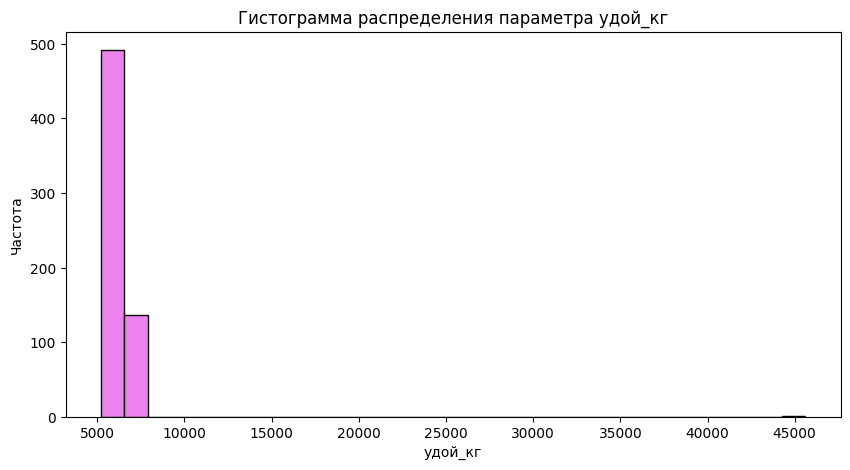

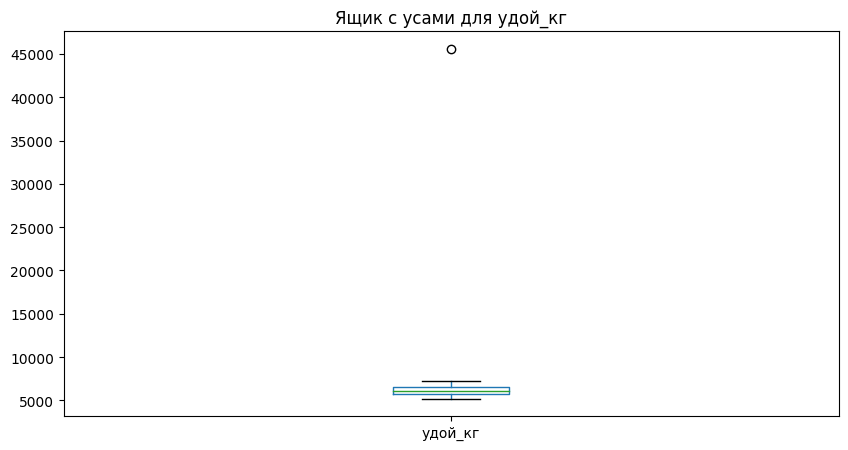

In [28]:
def describe_numeric(dataframe, param, bins=30, color='violet'):
    """ A function for exploratory analysis of numeric parameters"""
    
    # Описательная статистика
    print(dataframe[param].describe())
    
    # Гистограмма
    plt.figure(figsize=(10, 5))
    plt.hist(dataframe[param], bins=bins, color=color, edgecolor='black')
    plt.title(f'Гистограмма распределения параметра {param}')
    plt.xlabel(f'{param}')
    plt.ylabel('Частота')
    plt.show()
    
    # Ящик с усами
    plt.figure(figsize=(10, 5))
    dataframe[param].plot.box(title=f'Ящик с усами для {param}')
    plt.show()


describe_numeric(ferma_main, 'удой_кг')

In [29]:
ferma_main[ferma_main['удой_кг'] > 40000]

id  удой_кг   эке  сырой_протеин_г   спо          порода тип_пастбища  \
16  17    45616  11.5             1675  0.93  Вис Бик Айдиал    холмистое   

   порода_папы  жирность_%  белок_%  вкусное_молоко  возраст_<_2_лет  
16      Айдиал        3.22    3.076            True            False

In [30]:
ferma_dad[ferma_dad['id'] == 17]

id имя_папы
16  17   Буйный

In [31]:
# Удалим данные с аномально высоким удоем
ferma_dad = ferma_dad.drop(index=16).reset_index(drop=True)
ferma_main = ferma_main[ferma_main['удой_кг'] < 40000]

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64


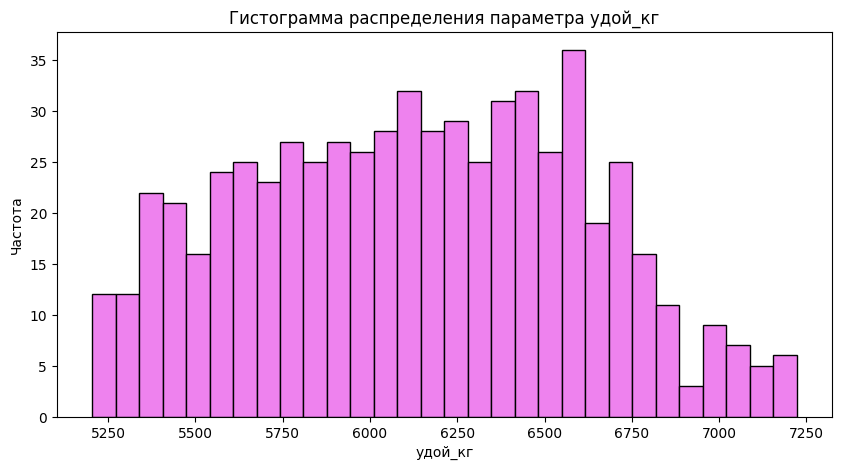

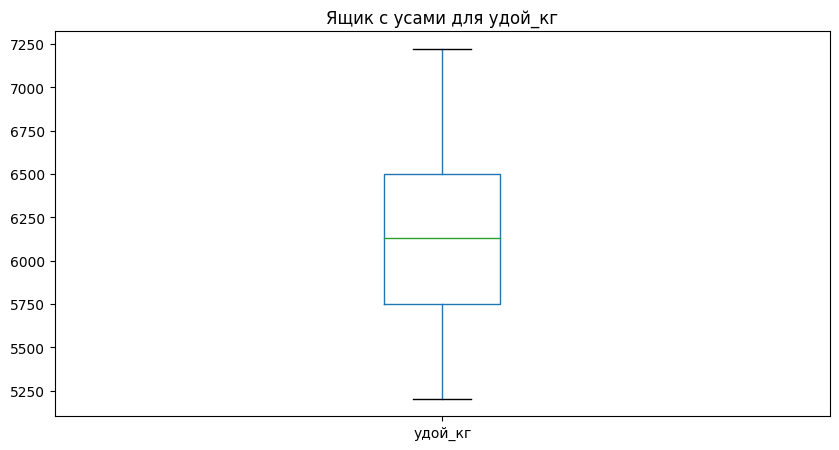

In [32]:
describe_numeric(ferma_main, 'удой_кг')

При анализе параметра "Удой_кг" выявлено аномально высокое значение 45616 кг, которое в разы превышает среднее значение параметра, поэтому принято решение удалить строку с аномалиями.
Распределение параметра близко к нормальному.

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64


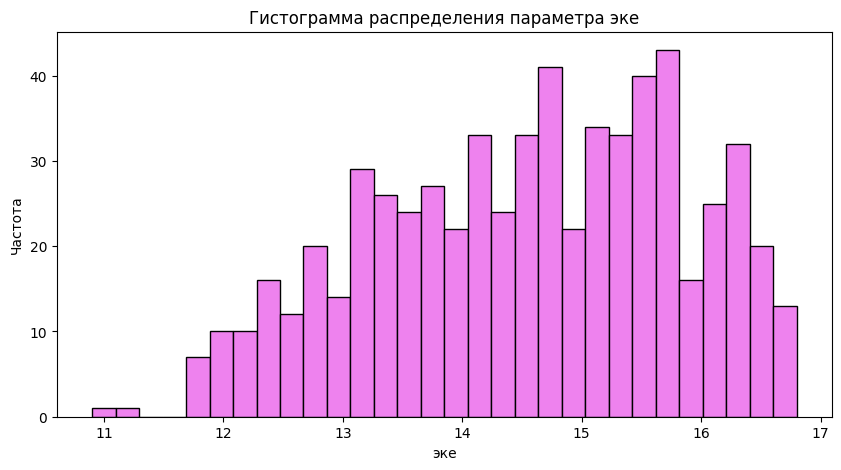

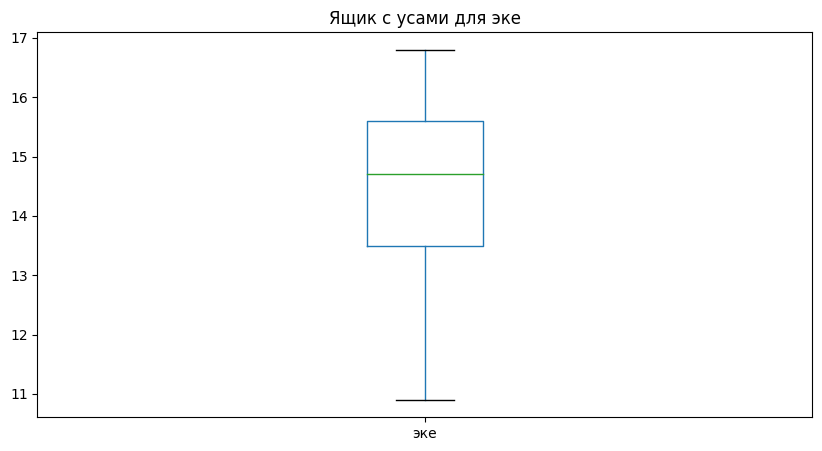

In [33]:
describe_numeric(ferma_main, 'эке')

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин_г, dtype: float64


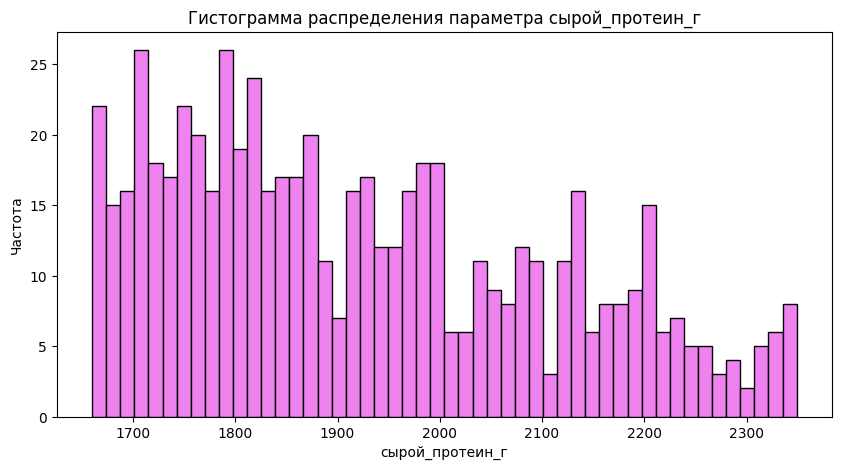

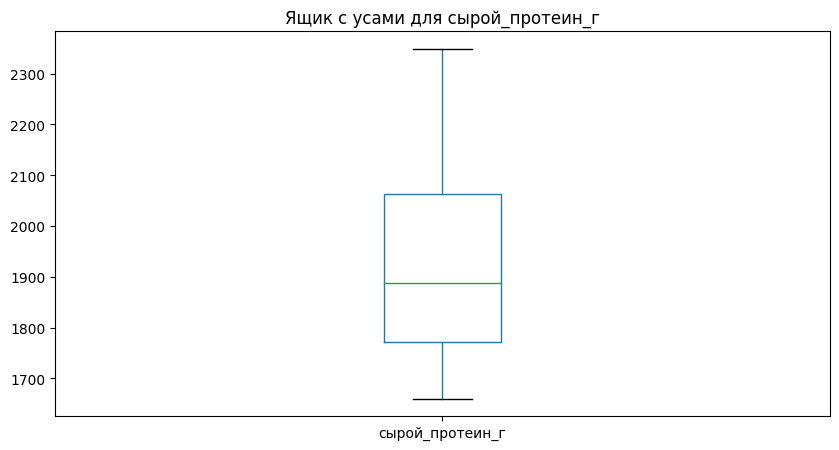

In [34]:
describe_numeric(ferma_main, 'сырой_протеин_г', bins=50)

Параметр "Содержание сырого протеина в корме" отличается неоднородностью, связанной, скорее всего, с нормами производства кормов - возможно, существуют корма с разным содержанием протеина для различных целей, и содержание может варьироваться в пределах нормы, например, по ГОСТу.

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64


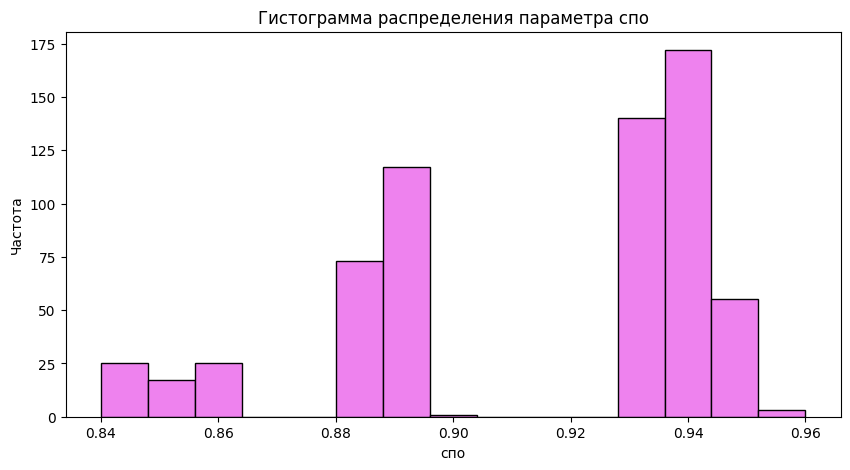

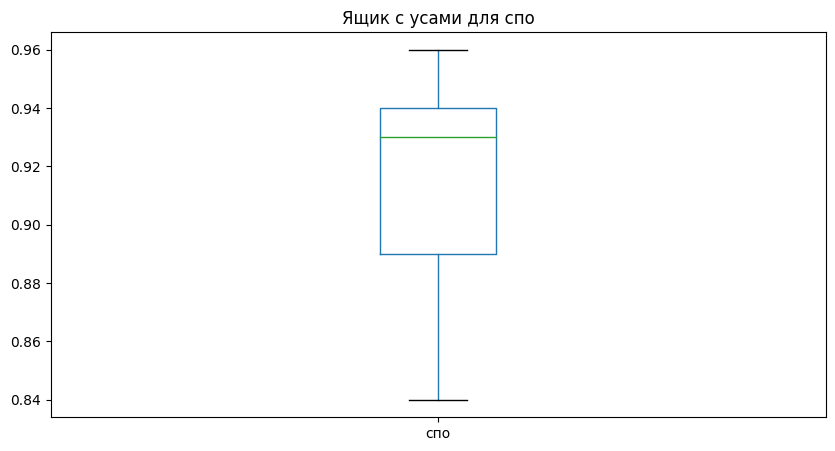

In [35]:
describe_numeric(ferma_main, 'спо', bins=15)

Сахаро-протеиновое соотношение принимает значения от 0.84 до 0.96, при этом явно выделяются 3 группы данных с границами на значениях 0.87, 0.92. Возможно, это связано с характеристиками корма (например, эконом или премиум).

Параметр жирности варьируется от 2.99 до 3.75, в среднем равен 3.65%. Значения до 3.4 можно назвать выбросами, однако не будем их удалять, так как порядок значений не отличается от основных данных.

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок_%, dtype: float64


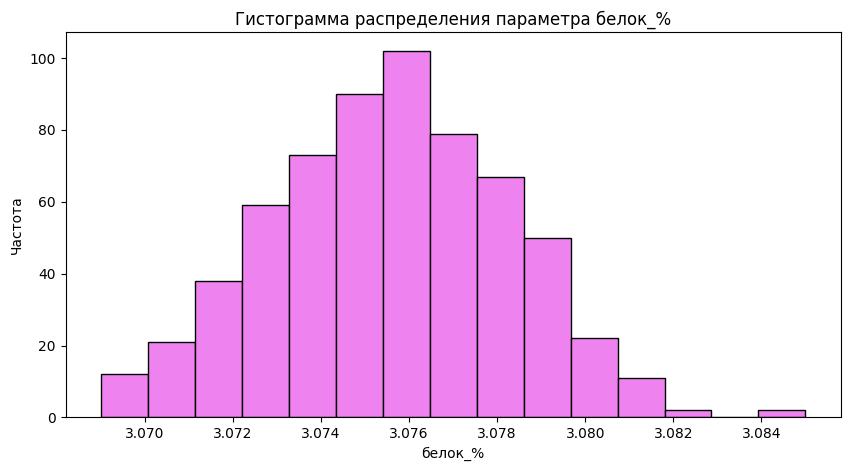

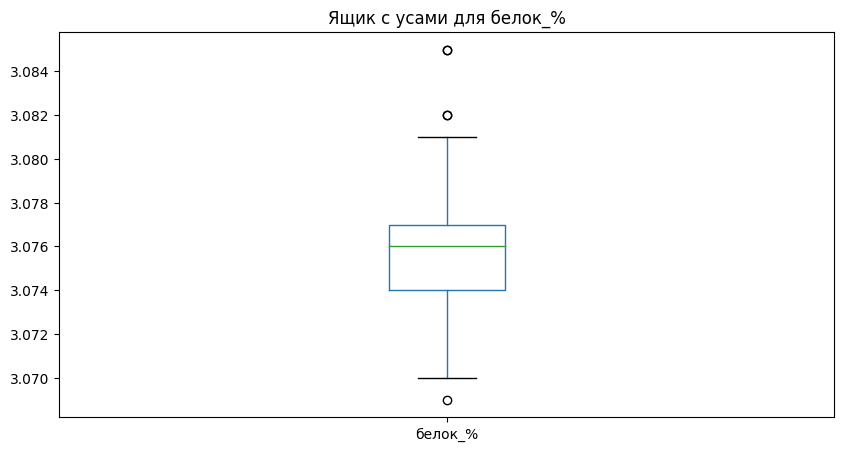

In [36]:
describe_numeric(ferma_main, 'белок_%', bins=15)

Параметр содержания белков в молоке распределен нормально, выбросов практически нет, среднее значение 3.07%.

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: жирность_%, dtype: float64


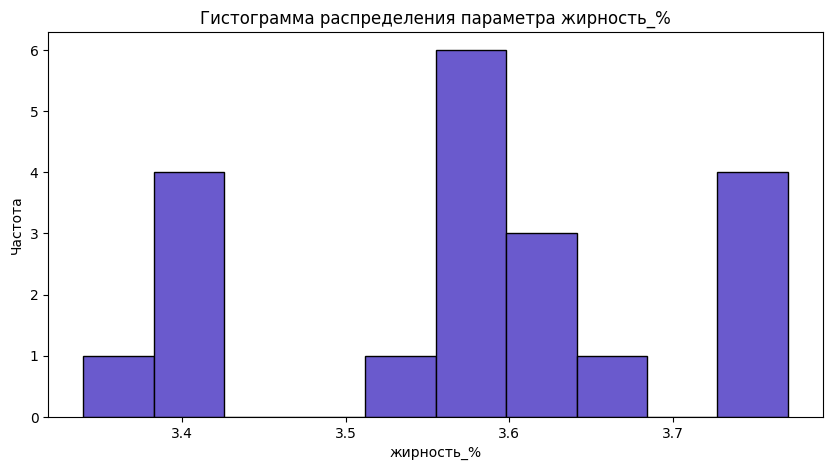

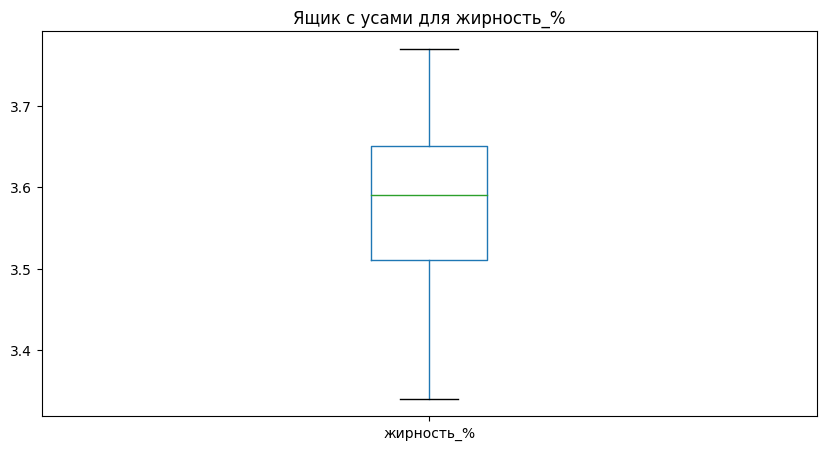

In [37]:
describe_numeric(cow_buy, 'жирность_%', color='slateblue', bins=10)

Параметр жирности молока на момент продажи у коров на продажу варьируется от 3.34 до 3.77%, что соответствует значениям жирности коров с фермы.

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: белок_%, dtype: float64


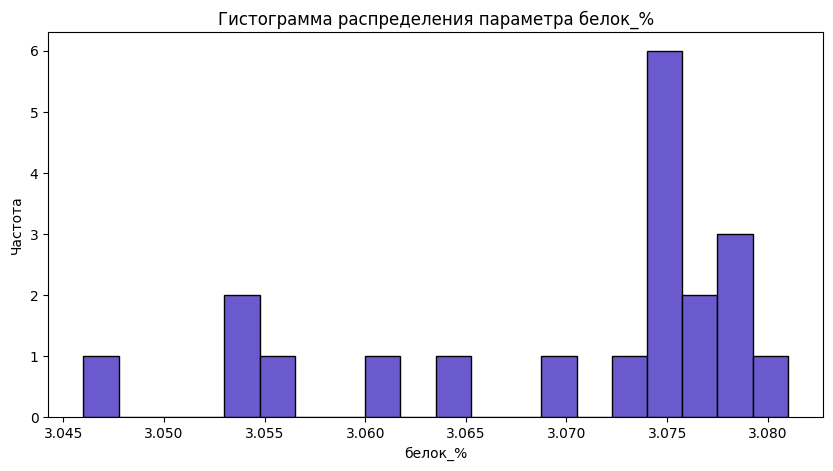

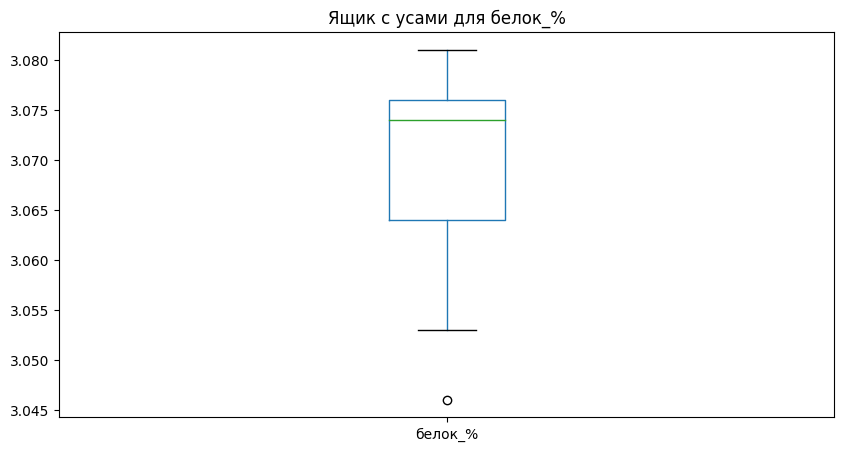

In [38]:
describe_numeric(cow_buy, 'белок_%', color='slateblue', bins=20)

Параметр содержания белков в молоке на момент продажи у коров Экофермы по значениям похож на параметр для коров фермы со средним значением 3.07%.

### Анализ категориальных признаков

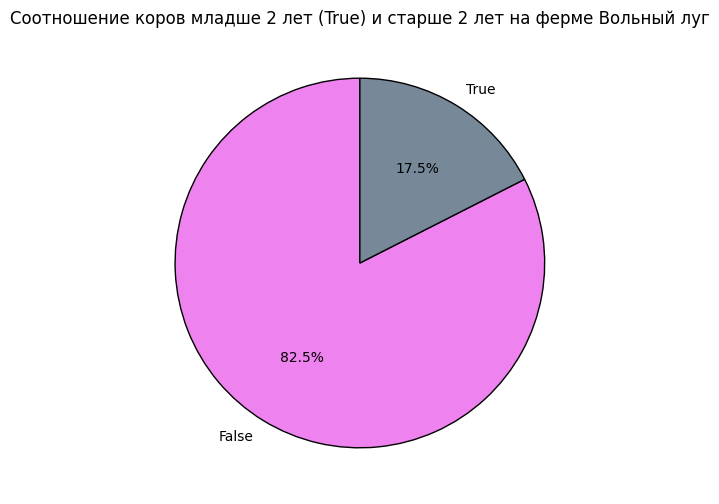

In [39]:
def describe_categor(dataframe, param, title):
    """ A function for visual demonstration of binary data"""
    plt.figure(figsize=(10, 6))
    dataframe[param].value_counts().plot.pie(title=title,
                                                   autopct='%1.1f%%', 
                                                   startangle=90,
                                                   colors = ['violet', 'lightslategrey'],
                                                   wedgeprops={'edgecolor': 'black'},
                                                   labels=dataframe[param].unique())
    plt.ylabel('')
    plt.show()
    
describe_categor(ferma_main, 'возраст_<_2_лет', title='Соотношение коров младше 2 лет (True) и старше 2 лет на ферме Вольный луг')

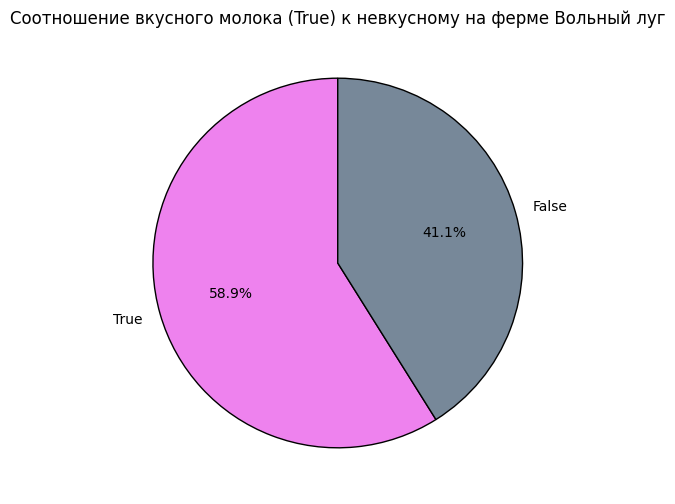

In [40]:
describe_categor(ferma_main, 'вкусное_молоко', title='Соотношение вкусного молока (True) к невкусному на ферме Вольный луг')

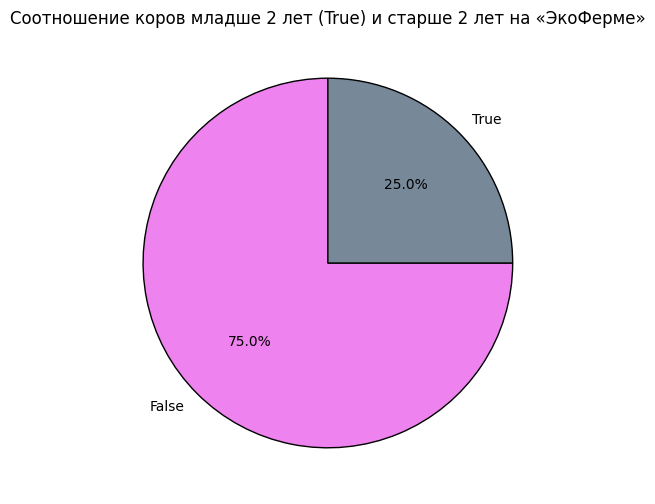

In [41]:
describe_categor(cow_buy, 'возраст_<_2_лет', title='Соотношение коров младше 2 лет (True) и старше 2 лет на «ЭкоФерме»')

Большая часть коров на ферме "Вольный луг" старше 2 лет, на "Экоферме" ситуация похожа: 74% коров старше 2 лет. 
На ферме "Вольный луг" больше половины коров дают вкусное молоко (59%).

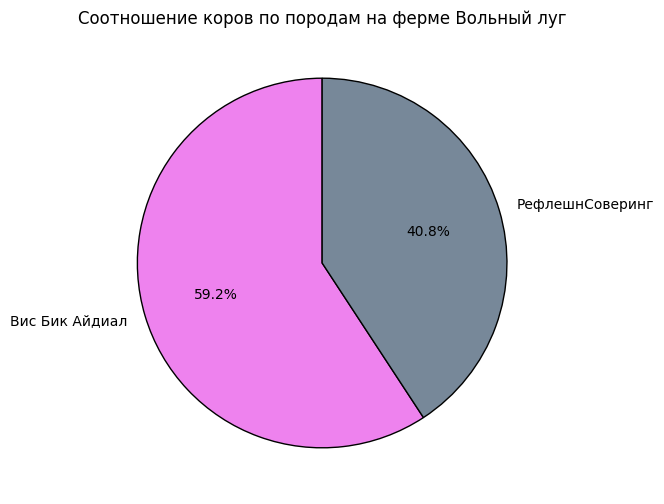

In [42]:
describe_categor(ferma_main, 'порода', title='Соотношение коров по породам на ферме Вольный луг')

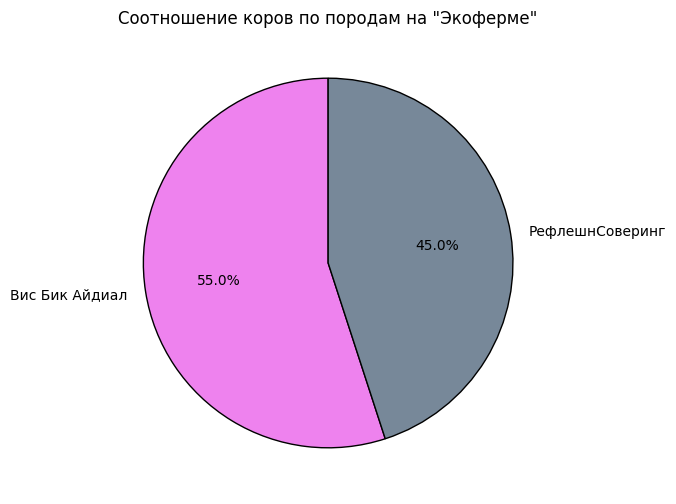

In [43]:
describe_categor(cow_buy, 'порода', title='Соотношение коров по породам на "Экоферме"')

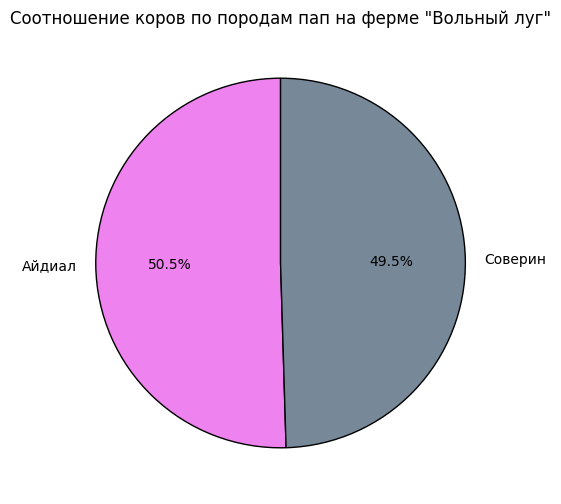

In [44]:
describe_categor(ferma_main, 'порода_папы', title='Соотношение коров по породам пап на ферме "Вольный луг"')

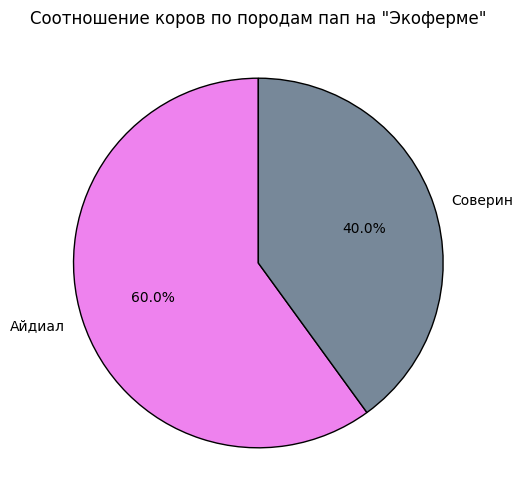

In [45]:
describe_categor(cow_buy, 'порода_папы', title='Соотношение коров по породам пап на "Экоферме"')

На обеих фермах породы распределены примерно одинаково, немного больше на всех фермах коров породы Айдиал и Вис Бик Айдиал.

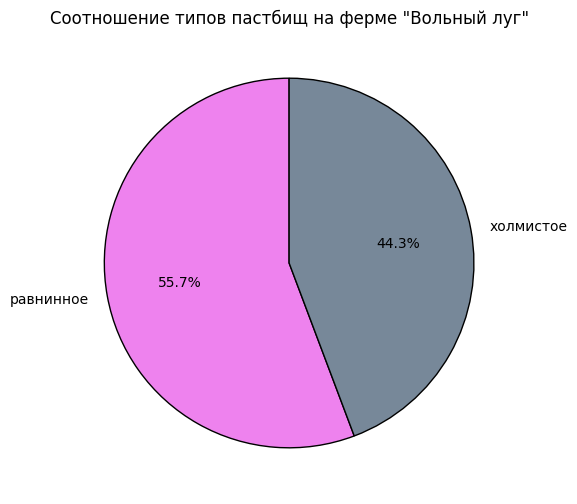

In [46]:
describe_categor(ferma_main, 'тип_пастбища', title='Соотношение типов пастбищ на ферме "Вольный луг"')

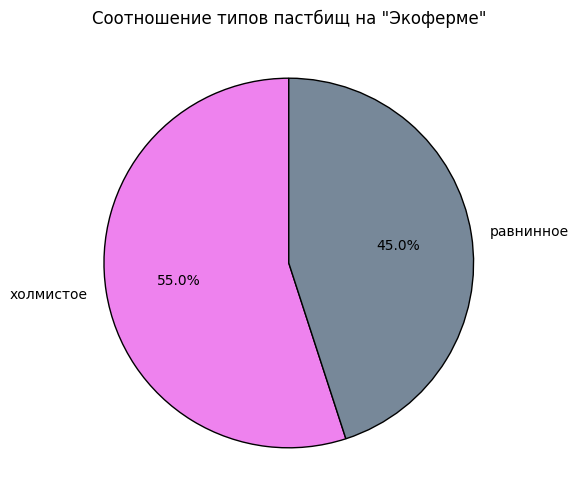

In [47]:
describe_categor(cow_buy, 'тип_пастбища', title='Соотношение типов пастбищ на "Экоферме"')

По типам пастбищ на обеих фермах примерно одинаковое распределение, но на "Вольный луг" немного преобладают равнинные пастбища, на Экоферме - холмистые.

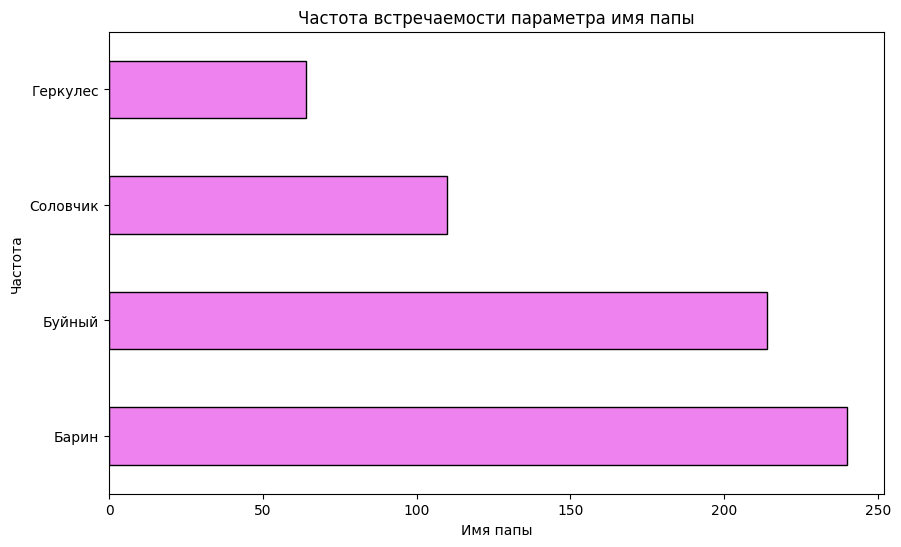

In [48]:
# Анализ признака имя папы
plt.figure(figsize=(10, 6))
ferma_dad['имя_папы'].value_counts().plot.barh(title=
                                               'Частота встречаемости параметра имя папы', color='violet', edgecolor='black')
plt.xlabel('Имя папы')
plt.ylabel('Частота')
plt.show()

На ферме всего 4 быка-папы, больше всего детей у Барина, меньше всего - у Геркулеса.

При анализе параметра "Удой_кг" выявлено аномально высокое значение 45616 кг, которое в разы превышает среднее значение параметра, поэтому принято решение удалить строку с аномалиями. Распределение параметра близко к нормальному.  

Параметр "Содержание сырого протеина в корме" у коров "Вольного луга" отличается неоднородностью, связанной, скорее всего, с нормами производства кормов - возможно, существуют корма с разным содержанием протеина для различных целей, и содержание может варьироваться в пределах нормы, например, по ГОСТу.    

ахаро-протеиновое соотношение принимает значения от 0.84 до 0.96, при этом явно выделяются 3 группы данных с границами на значениях 0.87, 0.92. Возможно, это связано с характеристиками корма (например, эконом или премиум).

Параметр жирности у "Вольного луга" варьируется от 2.99 до 3.75, в среднем равен 3.65%. Значения до 3.4 можно назвать выбросами, однако не будем их удалять, так как порядок значений не отличается от основных данных.  Для "Экофермы" параметр жирности молока на момент продажи у коров на продажу варьируется от 3.34 до 3.77%, что соответствует значениям жирности коров с фермы.

Параметр содержания белков в молоке распределен нормально, выбросов практически нет, среднее значение 3.07%. Параметр содержания белков в молоке на момент продажи у коров Экофермы по значениям похож на параметр для коров фермы со средним значением 3.07%.   

Большая часть коров на ферме "Вольный луг" старше 2 лет, на "Экоферме" ситуация похожа: 74% коров старше 2 лет. На ферме "Вольный луг" больше половины коров дают вкусное молоко (59%).   

На обеих фермах породы распределены примерно одинаково, немного больше на всех фермах коров породы Айдиал и Вис Бик Айдиал.   

По типам пастбищ на обеих фермах примерно одинаковое распределение, но на "Вольный луг" немного преобладают равнинные пастбища, на Экоферме - холмистые.   

На ферме все коровы происходят от 4 быков, больше всего потомства у быка Барина, меньше всего - у Геркулеса.

Большинство признаков разного масштаба, поэтому далее количественные признаки необходимо масштабировать, категориальные признаки - кодировать. 

## Корреляционный анализ

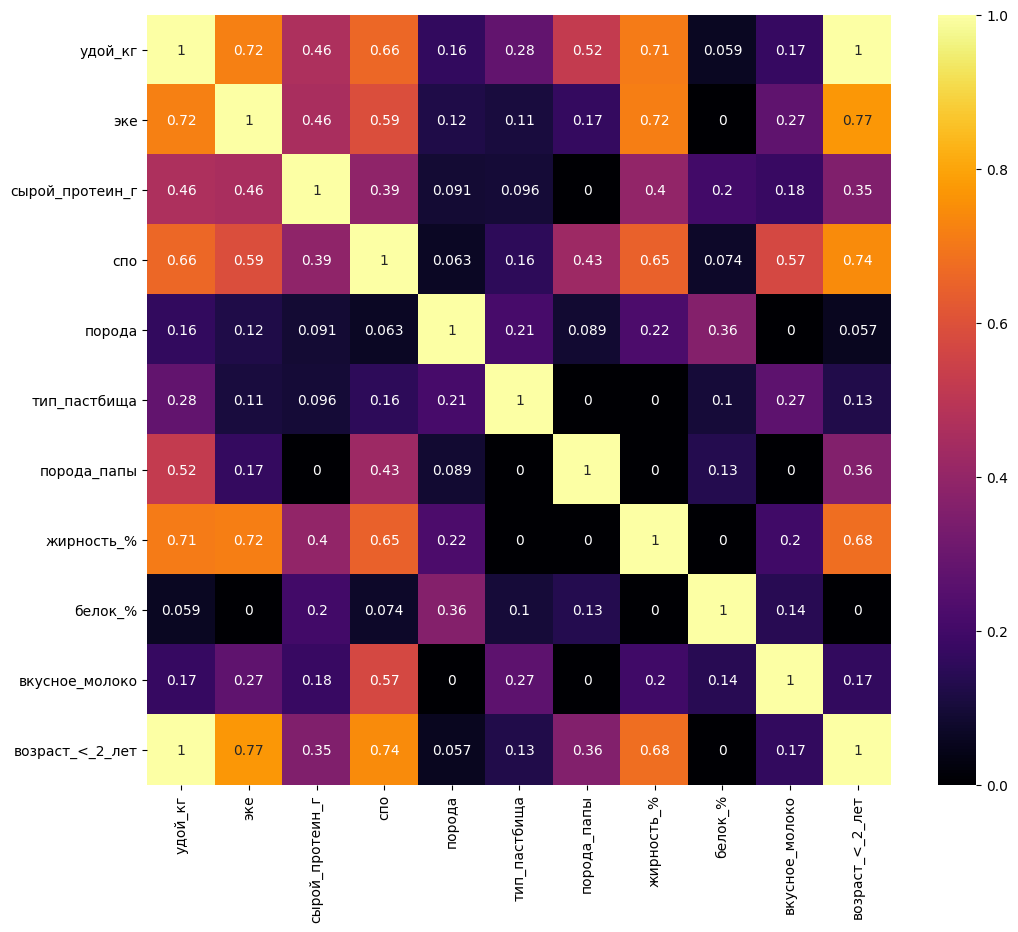

In [49]:
# Посмотрим на связь признаков с помощью коэффициента фи
plt.figure(figsize=(12, 10))
sns.heatmap(ferma_main.drop('id', axis=1).phik_matrix(interval_cols=['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']), annot=True, cmap='inferno')
plt.show()

На целевой признак удой влияют количественные признаки: ЭКЕ (0.72), СПО (0.66), сырой протеин (0.46), жирность (0.71).
На целевой признак удой также влияют категориальные признаки: возраст коровы (менее 2 лет, коэффициент корреляции Фи 1), порода папы (0.52), тип пастбища(0.28).   
На целевой признак вкус молока влияют (делают молоко вкусным по мнению фермера): СПО (0.57), ЭКЕ (0.27), тип пастбища(0.27).     
Между входными признаками нет мультиколлинеарности (сильная зависимость с коэфф корреляции больше 0.9 наблюдается только для возраста коровы и удоем, но удой - целевой признак)

Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

In [51]:
quantitative_features = ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы', 'вкусное_молоко', 'возраст_<_2_лет']

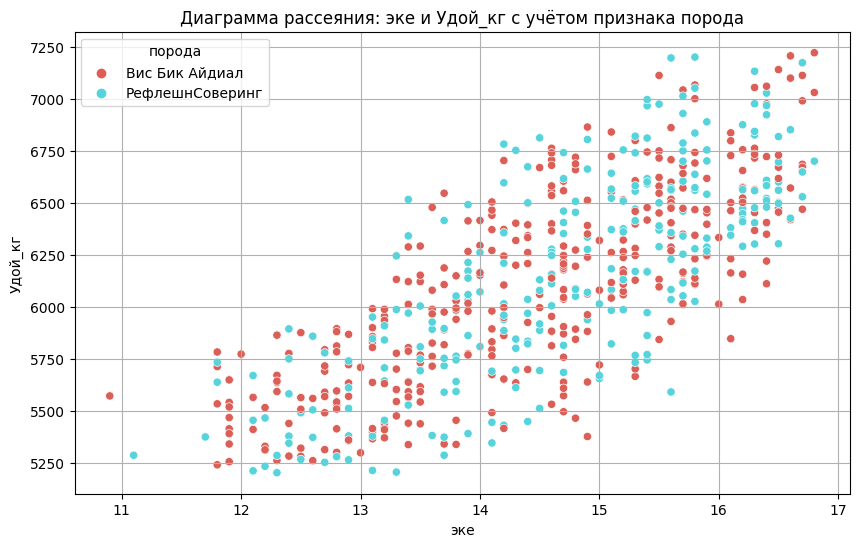

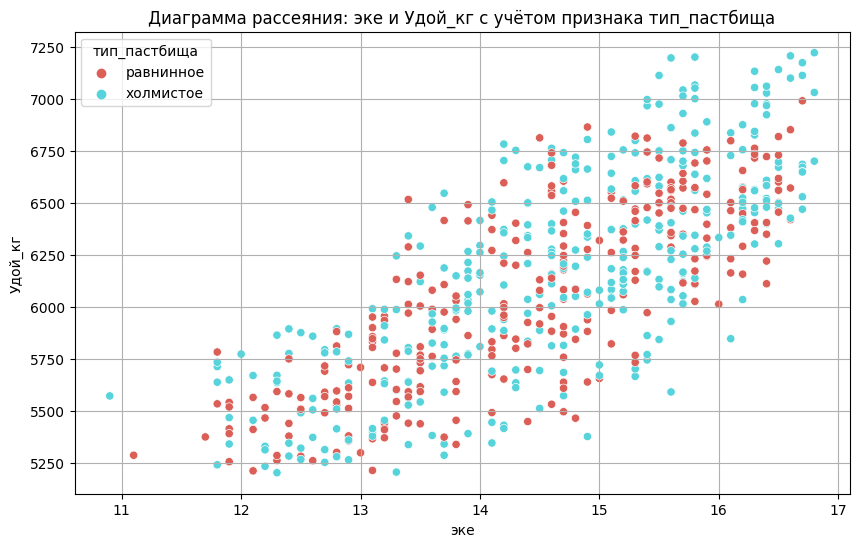

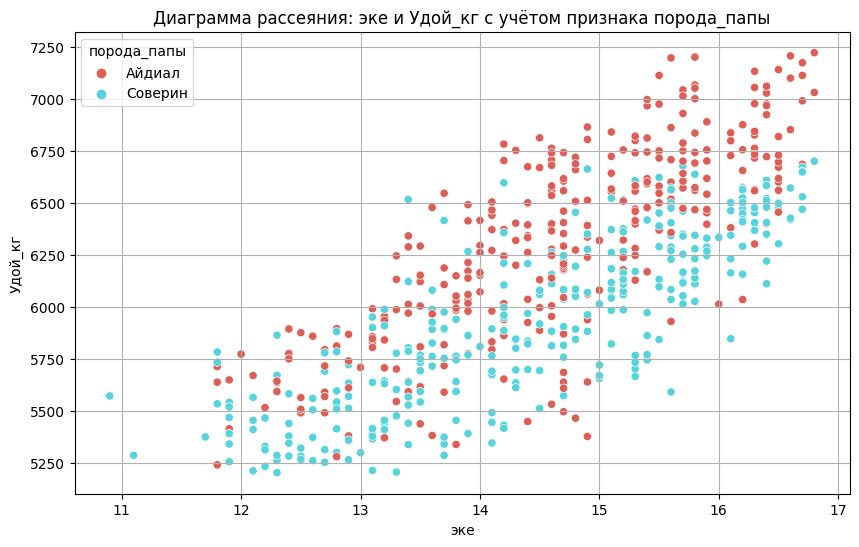

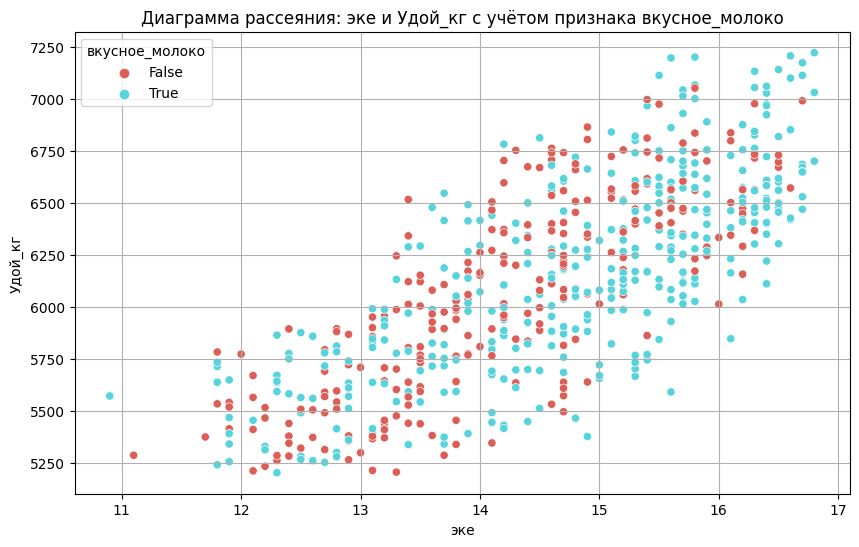

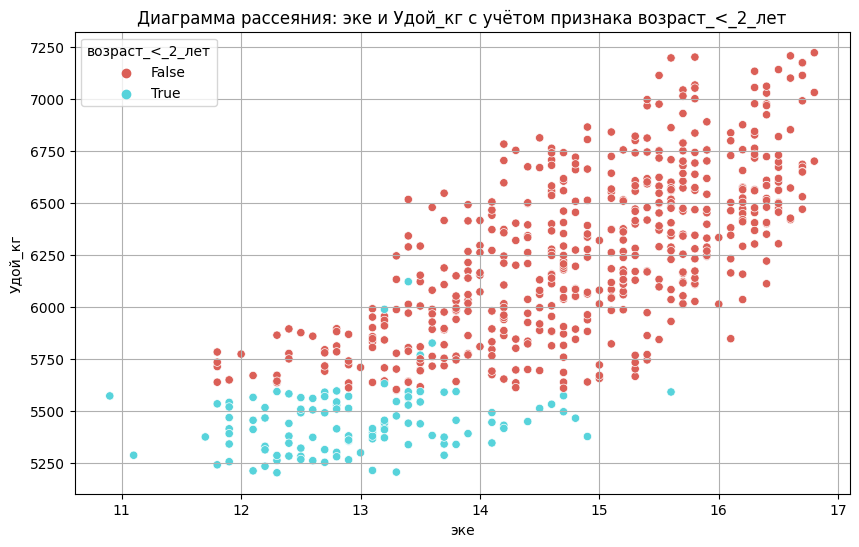

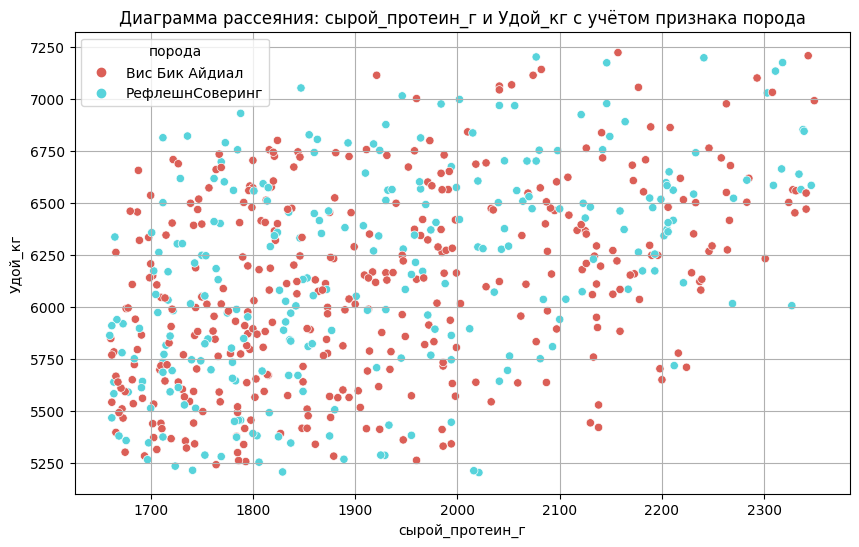

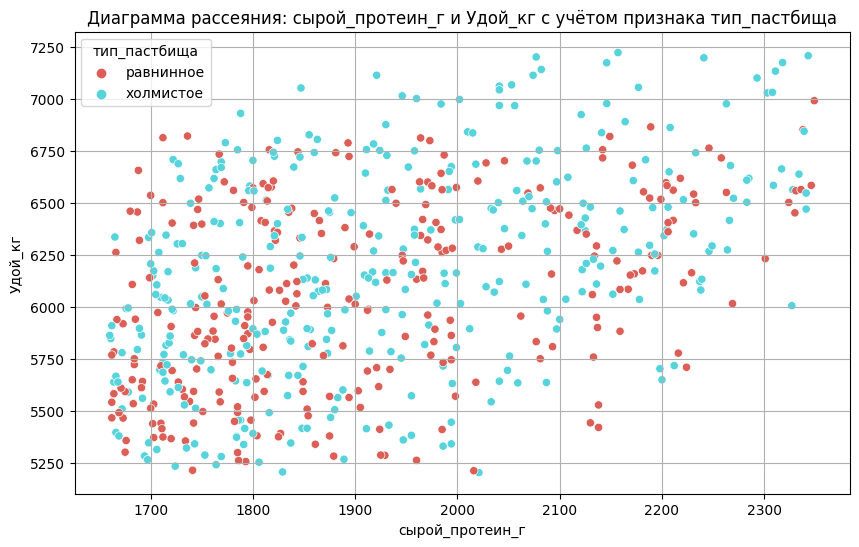

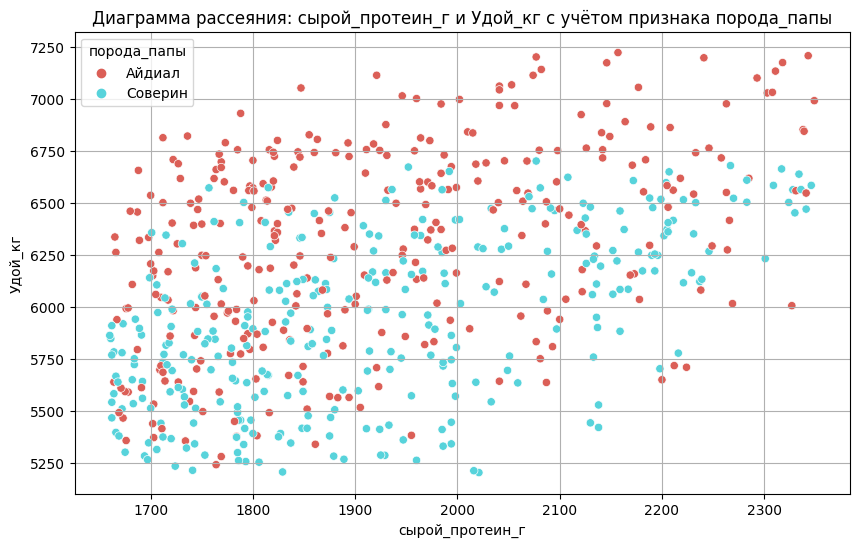

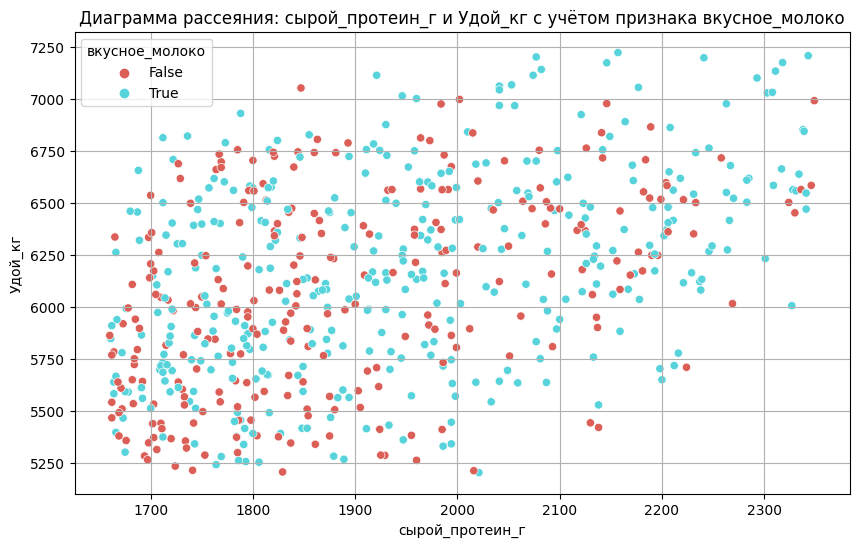

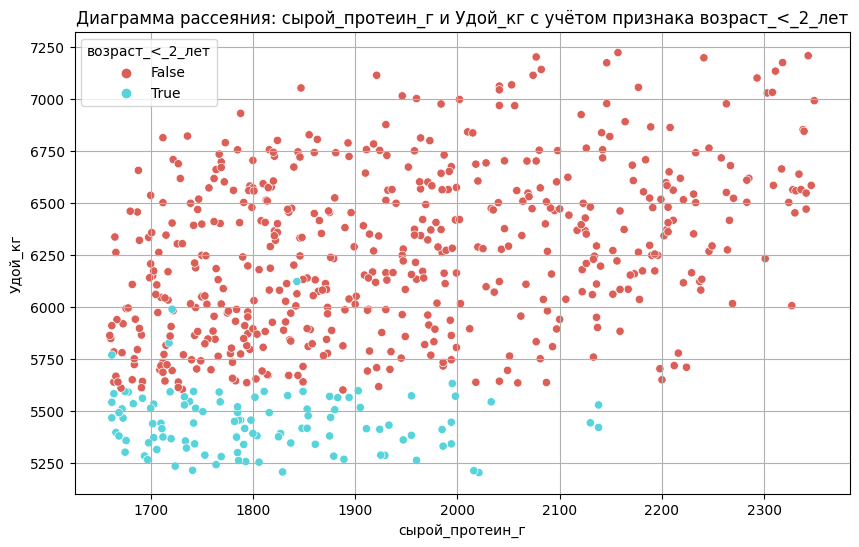

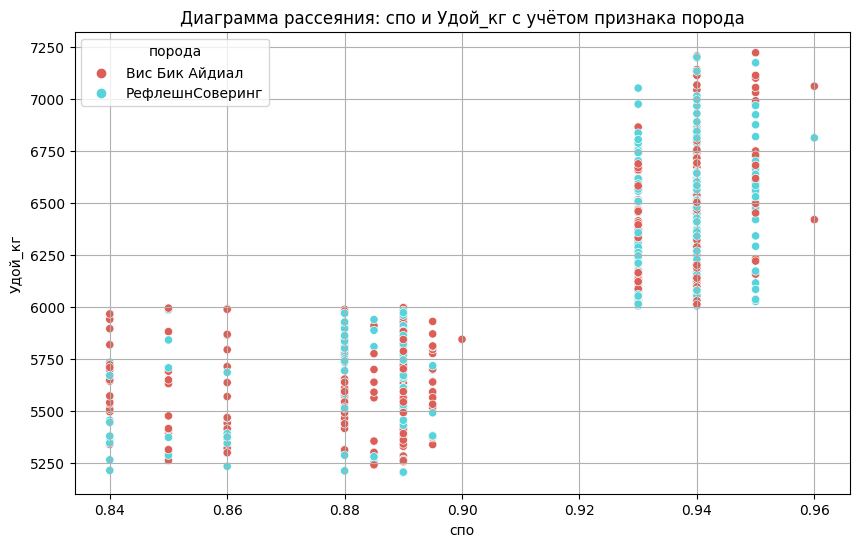

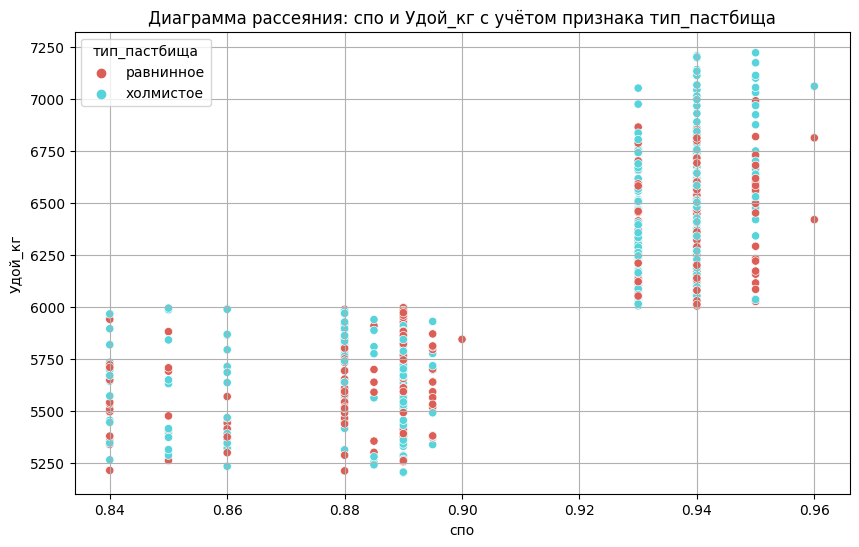

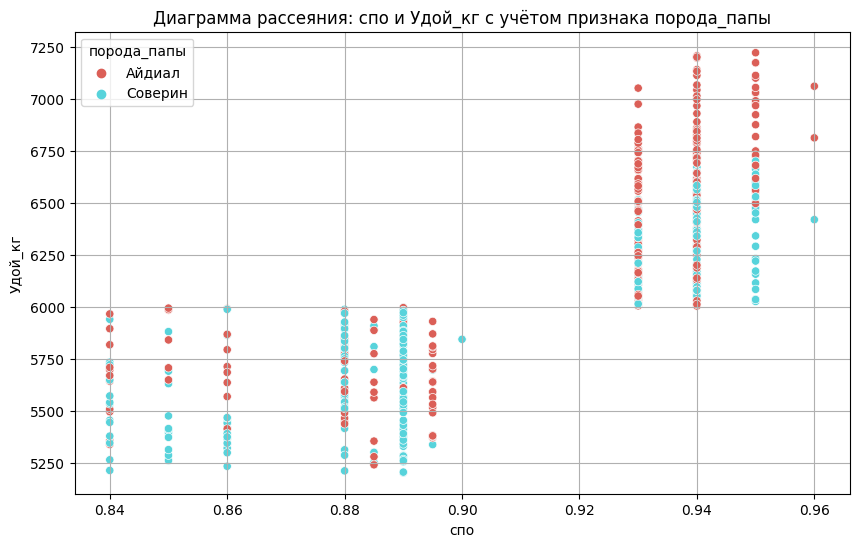

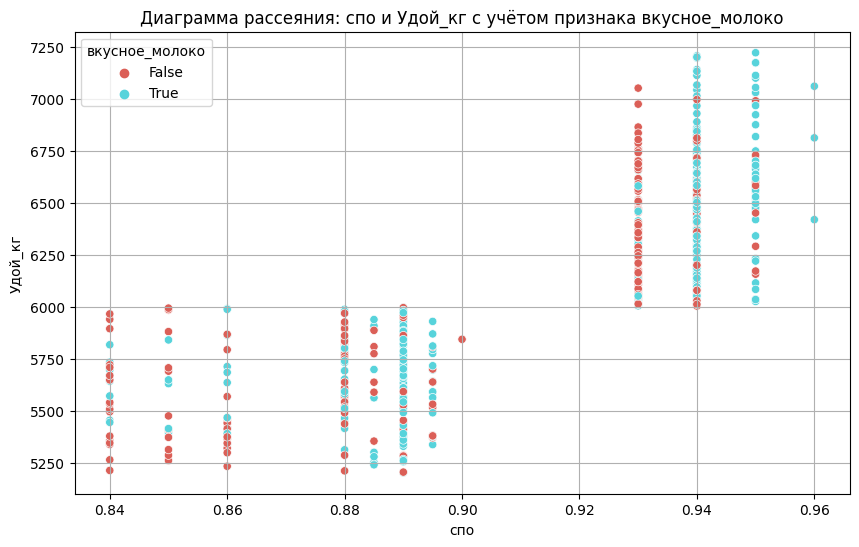

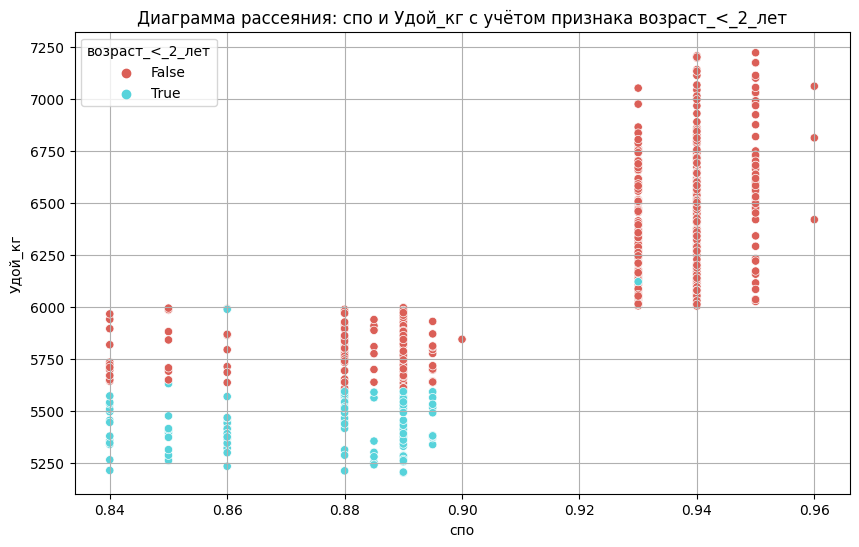

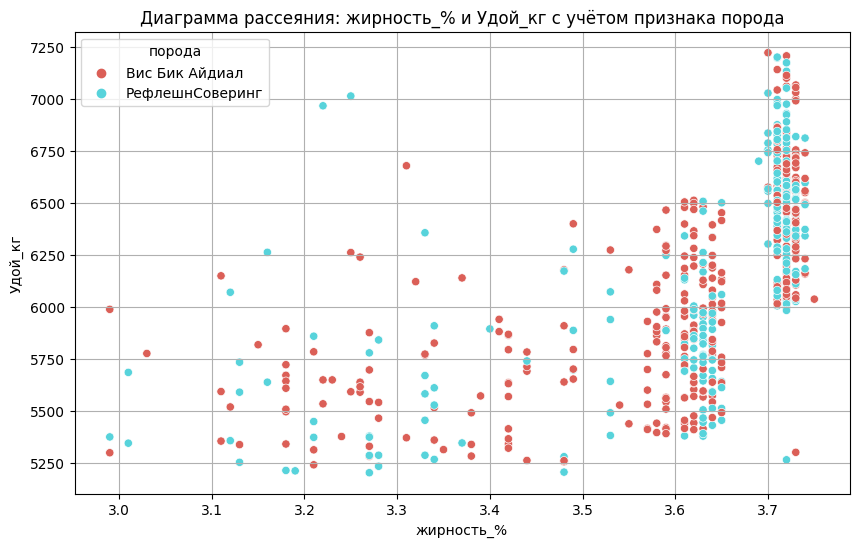

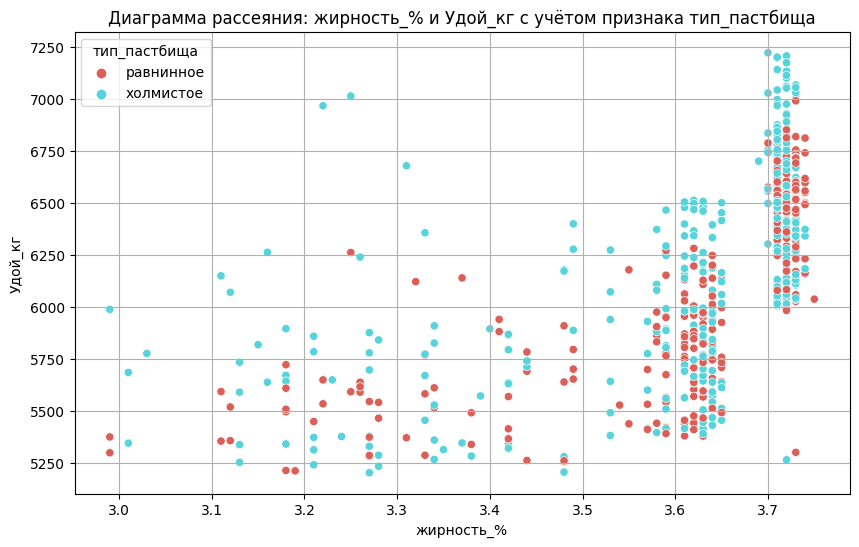

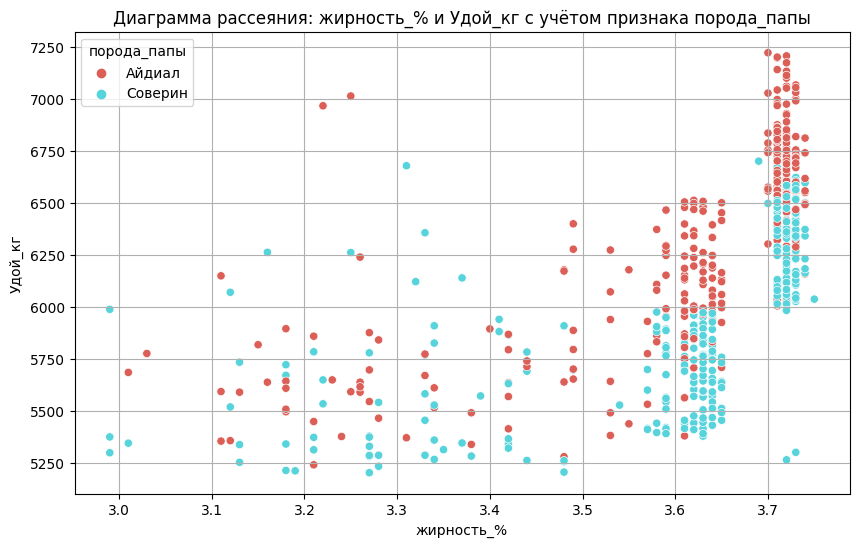

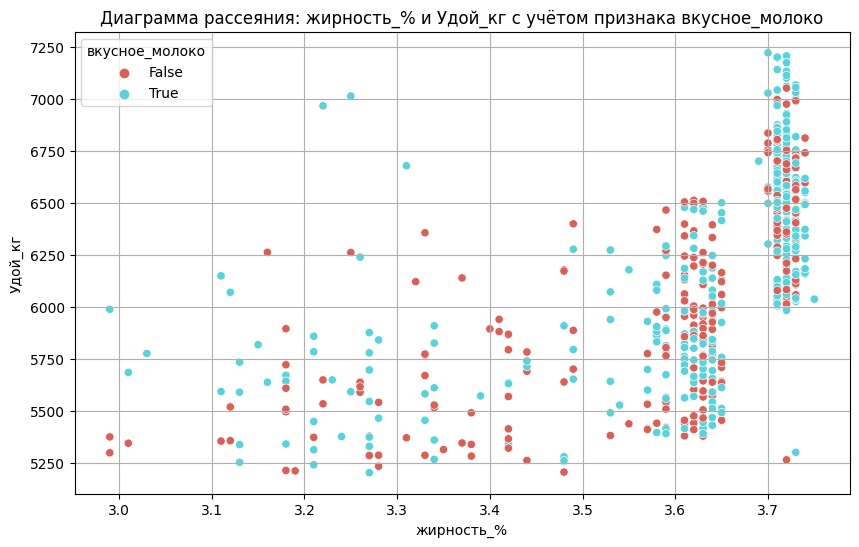

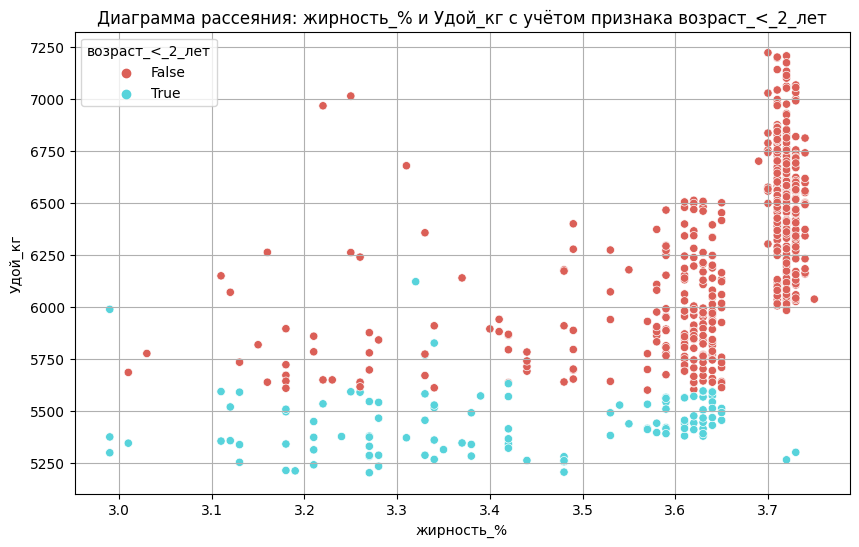

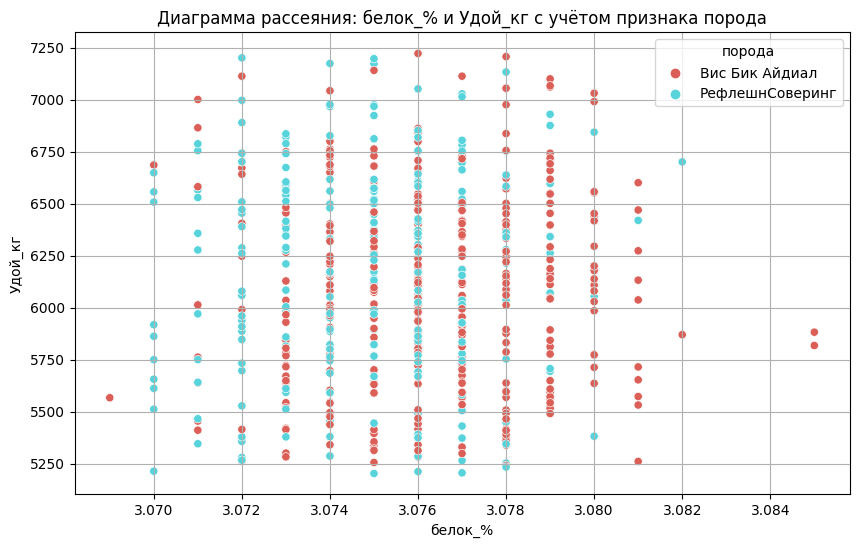

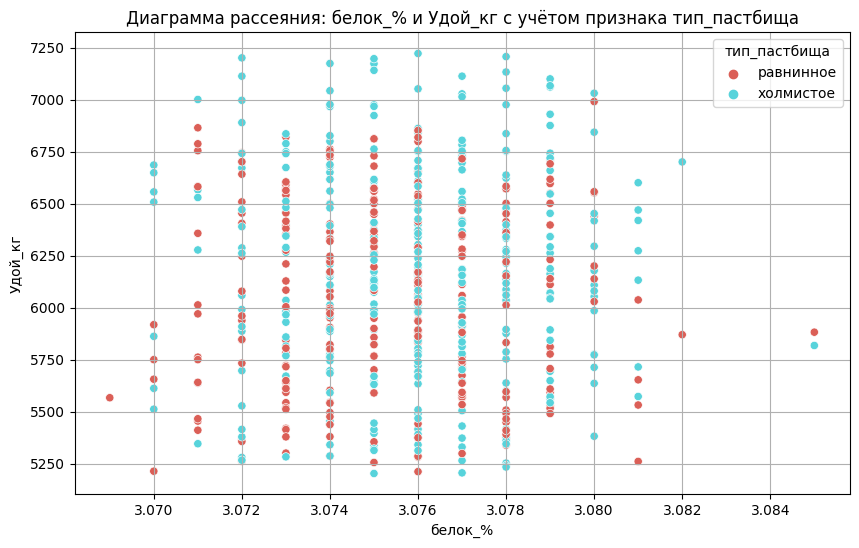

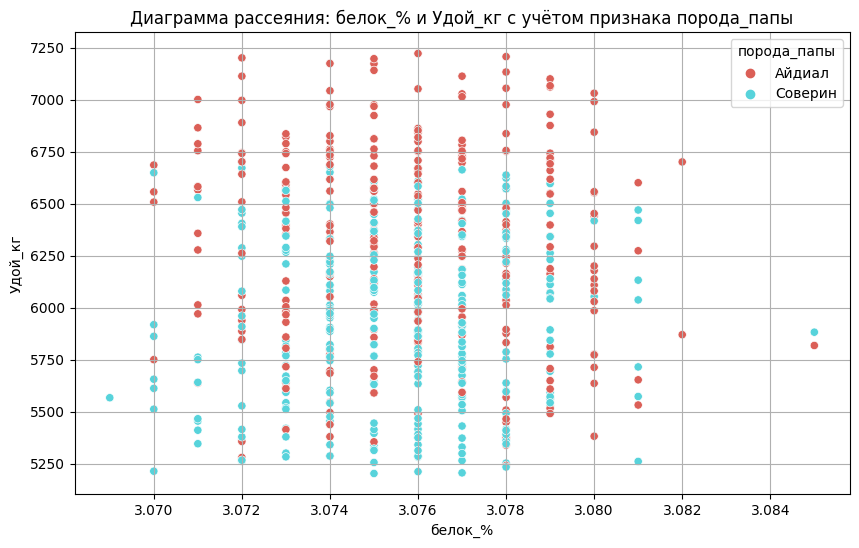

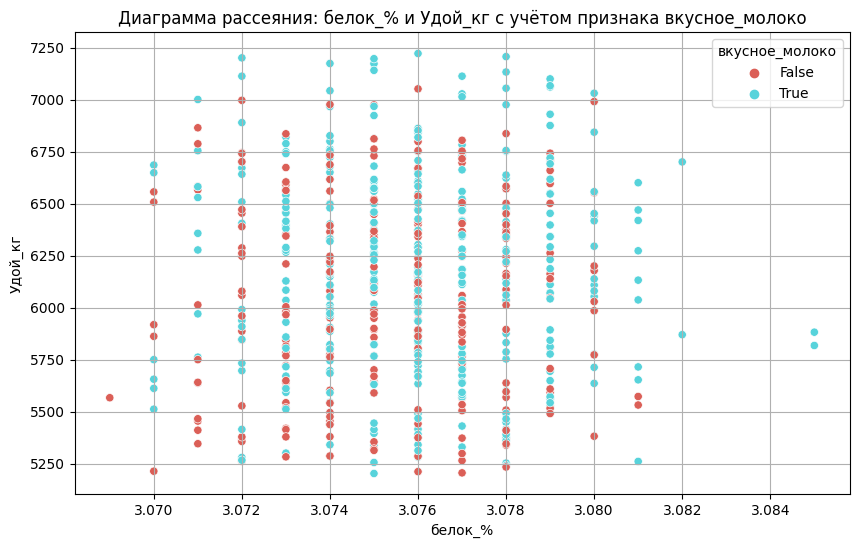

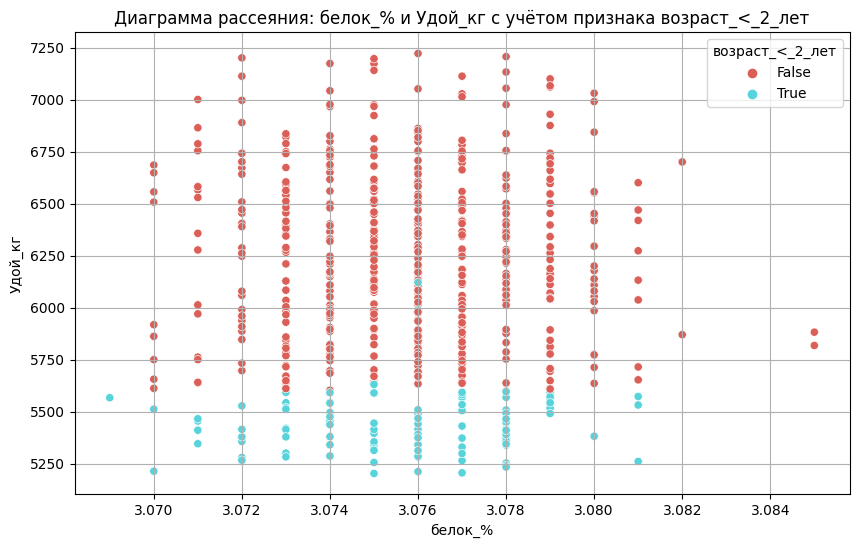

In [52]:
# Построение scatterplot для "удой_кг" (на оси Y) и всех количественных признаков (на оси X)
for quant_feature in quantitative_features:
    for cat_feature in categorical_features:
        if quant_feature != 'удой_кг':
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=quant_feature, y='удой_кг', hue=cat_feature, data=ferma_main, palette='hls')
            plt.title(f'Диаграмма рассеяния: {quant_feature} и Удой_кг с учётом признака {cat_feature}')
            plt.xlabel(quant_feature)
            plt.ylabel('Удой_кг')
            plt.legend(title=cat_feature)
            plt.grid(True)
            plt.show()

Зависимость удоя от ЭКЕ выглядит квадратичной. При этом признак порода папы также оказывает влияние на удой: у коров, папа которых представляет породу Айдиал, удой в среднем выше.   
Также возраст породы сильно влияет на удой: молодые коровы дают меньше молока.     
Сырой протеин прямо влияет на удой - с увеличением содержания белка в корме удой выше.   
СПО влияет на удой (нелинейно) - с увеличением СПО в корме удой становится выше.   
Жирность влияет на удой (квадратично) - выше жирность - выше удой.   
Линейная связь между содержанием белка в молоке и удоем отсутствует.   

Можно попробовать ввести дополнительный признак - ЭКЕ^2 и Жирность^2, чтобы проверить, улучшится ли связь между этими входными признаками и целевым. 

## Обучение модели линейной регрессии

### Модель линейной регрессии №1

Категориальные признаки: ['порода_папы', 'порода', 'возраст_<_2_лет', 'тип_пастбища']
Количественные признаки: ['эке', 'сырой_протеин_г', 'спо']
порода_папы        2
порода             2
возраст_<_2_лет    2
тип_пастбища       2
dtype: int64


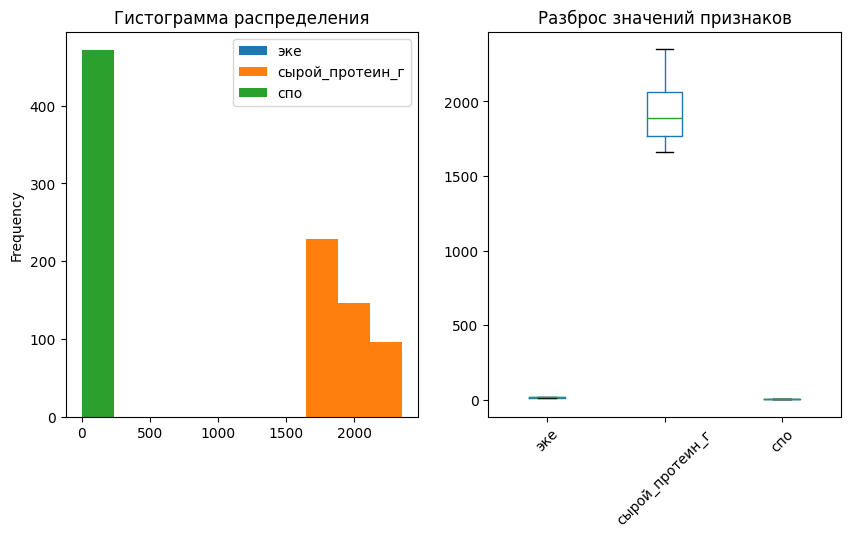

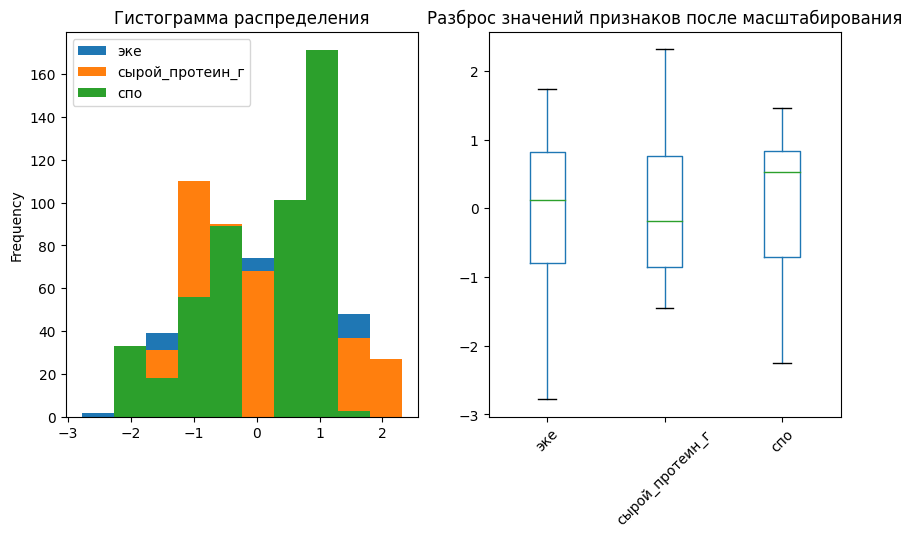

R2 LinearRegression = 0.7844078173416968


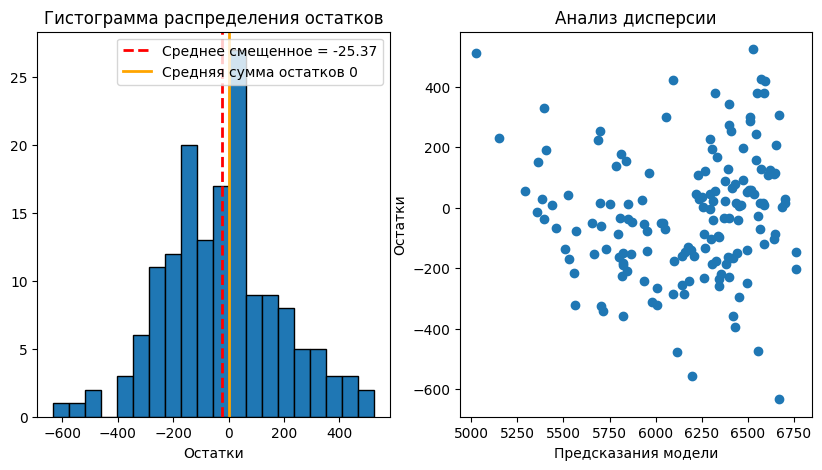

In [53]:
# Разобьем данные датасета ferma_main на тренировочную и тестовую выборки

quantitative_features = ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%', 'эке_квадрат']
categorical_features = ['порода', 'тип_пастбища', 'порода_папы', 'вкусное_молоко', 'возраст_<_2_лет', 'спо_>_0.92', 'имя_папы']

X_1 = ferma_main[['эке', 'сырой_протеин_г', 'спо', 'порода_папы', 'порода', 'возраст_<_2_лет', 'тип_пастбища']]
y_1 = ferma_main['удой_кг']

RANDOM_STATE = 42

def process_and_train_model(X, y):
    """A function for splitting the data, scaling and coding, training a LinearRegression model,
       predicting results and estimation of model quality"""
    # Разбиение данных на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    # Определение категориальных и количественных признаков
    cat_col_names = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
    num_col_names = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Проверяем, что списки заполнены правильно
    print("Категориальные признаки:", cat_col_names)
    print("Количественные признаки:", num_col_names)

    # Построение гистограммы и боксплота для количественных признаков
    print(X_train[cat_col_names].nunique())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    plt.show()

    # Масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    # Кодирование категориальных признаков
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    # Получение имен закодированных признаков
    encoder_col_names = encoder.get_feature_names(cat_col_names)

    # Преобразование массивов NumPy в DataFrame
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names, index=X_train.index)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names, index=X_test.index)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names, index=X_test.index)

    # Объединение признаков
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # Проверка распределения и разброса после масштабирования
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков после масштабирования')
    plt.show()

    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Прогнозирование на тестовой выборке
    predictions = model.predict(X_test)

    # Оценка качества модели с помощью коэффициента детерминации R^2
    r2 = r2_score(y_test, predictions)
    print("R2 LinearRegression =", r2)

    # Анализ остатков
    residuals = y_test - predictions
    mean_residuals = np.mean(residuals)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].hist(residuals, edgecolor='black', bins=20)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    axes[0].axvline(mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Среднее смещенное = {mean_residuals:.2f}')
    axes[0].axvline(x=0, color='orange', linestyle='-', linewidth=2, label='Средняя сумма остатков 0')
    axes[0].legend()

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    
    return model, r2, residuals, predictions, y_test, scaler, encoder


model_1, r2_1, residuals_1, predictions_1, y_test, scaler_1, encoder_1 = process_and_train_model(X_1, y_1)


В качестве входных признаков для модели линейной регрессии 1 выбраны признаки с высоким коэффициентом корреляции с целевым признаком (удой), а также те признаки, которые логически могут влиять на удой.

Коэффициент детерминации 0.784.   
Остатки распределены нормально со смещением влево: модель завышает значения. Дисперсия остатков показывает, что разброс остатков не постоянен, модель может работать некорректно для предсказания высокого удоя, а также может быть не учтена нелинейность зависимости целевого признака от входных.

### Модель линейной регрессии №2

Так как количественный признак СПО легко разделяется на несколько групп значений, преобразуем его в бинарный категориальный признак. Также устраним нелинейность зависимости удоя от ЭКЕ.

In [54]:
# Преобразование СПО в категориальный признак спо_>_0.92

ferma_main['спо_>_0.92'] = (ferma_main['спо'] > 0.92).astype(bool)

# Введение нового признака - ЭКЕ в квадрате

ferma_main['эке_квадрат'] = ferma_main['эке'] ** 2

In [55]:
# Подготовка даннных для модели 2
X_2 = ferma_main[['эке_квадрат', 'сырой_протеин_г', 'спо_>_0.92', 'порода_папы', 'порода', 'возраст_<_2_лет', 'тип_пастбища']]
y_2 = ferma_main['удой_кг']

Категориальные признаки: ['спо_>_0.92', 'порода_папы', 'порода', 'возраст_<_2_лет', 'тип_пастбища']
Количественные признаки: ['эке_квадрат', 'сырой_протеин_г']
спо_>_0.92         2
порода_папы        2
порода             2
возраст_<_2_лет    2
тип_пастбища       2
dtype: int64


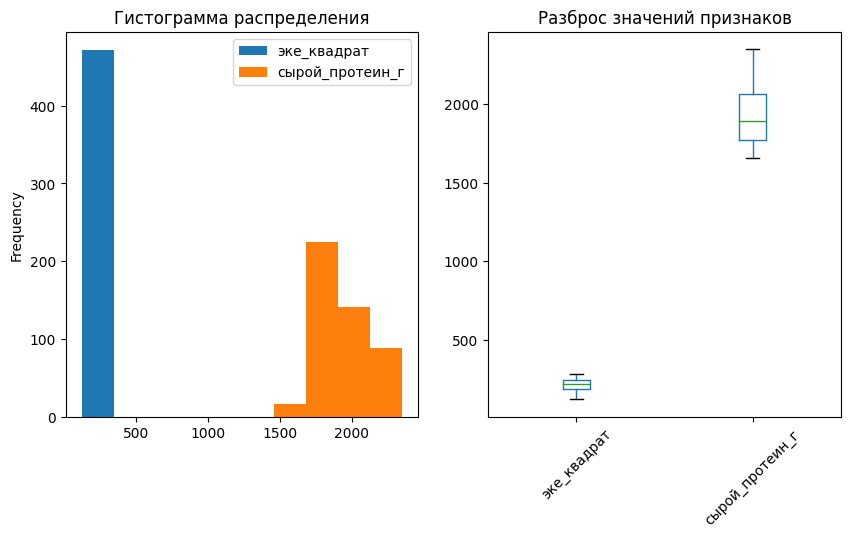

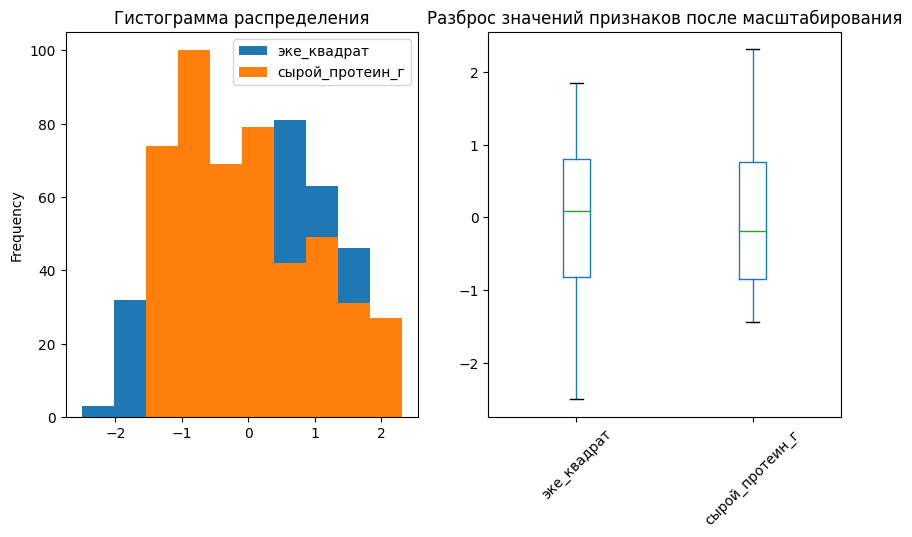

R2 LinearRegression = 0.8180879926867504


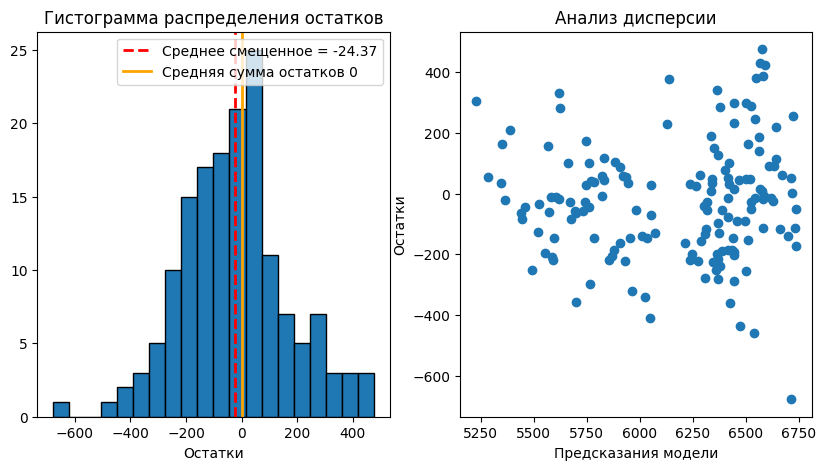

In [56]:
# Создание модели линейной регрессии 2
model_2, r2_2, residuals_2, predictions_2, y_test, scaler_2, encoder_2 = process_and_train_model(X_2, y_2)

Ситуация стала немного лучше:   
Коэффициент детерминации 0.818.
Остатки распределены нормально с чуть меньшим смещением влево: модель все еще завышает значения. Дисперсия остатков показывает, что разброс остатков не постоянен, модель может работать некорректно для предсказания как низкого, так и высокого удоя (выше 6250).

### Модель линейной регрессии №3

In [57]:
# Добавление признака имя папы к остальным данным
ferma_main = ferma_main.merge(ferma_dad, on='id')
ferma_main.head()

id  удой_кг   эке  сырой_протеин_г    спо           порода тип_пастбища  \
0   1     5863  14.2             1743  0.890   Вис Бик Айдиал    равнинное   
1   2     5529  12.8             2138  0.890   Вис Бик Айдиал    равнинное   
2   3     5810  14.0             1854  0.885  РефлешнСоверинг    холмистое   
3   4     5895  12.4             2012  0.885  РефлешнСоверинг    холмистое   
4   5     5302  12.8             1675  0.885   Вис Бик Айдиал    равнинное   

  порода_папы  жирность_%  белок_%  вкусное_молоко  возраст_<_2_лет  \
0      Айдиал        3.58    3.076            True            False   
1     Соверин        3.54    3.079            True             True   
2     Соверин        3.59    3.074           False            False   
3      Айдиал        3.40    3.075           False            False   
4     Соверин        3.73    3.073            True             True   

   спо_>_0.92  эке_квадрат  имя_папы  
0       False       201.64    Буйный  
1       False       163.84  Соловчик  
2       False       196.00     Барин  
3       False       153.76    Буйный  
4       False       163.84     Барин

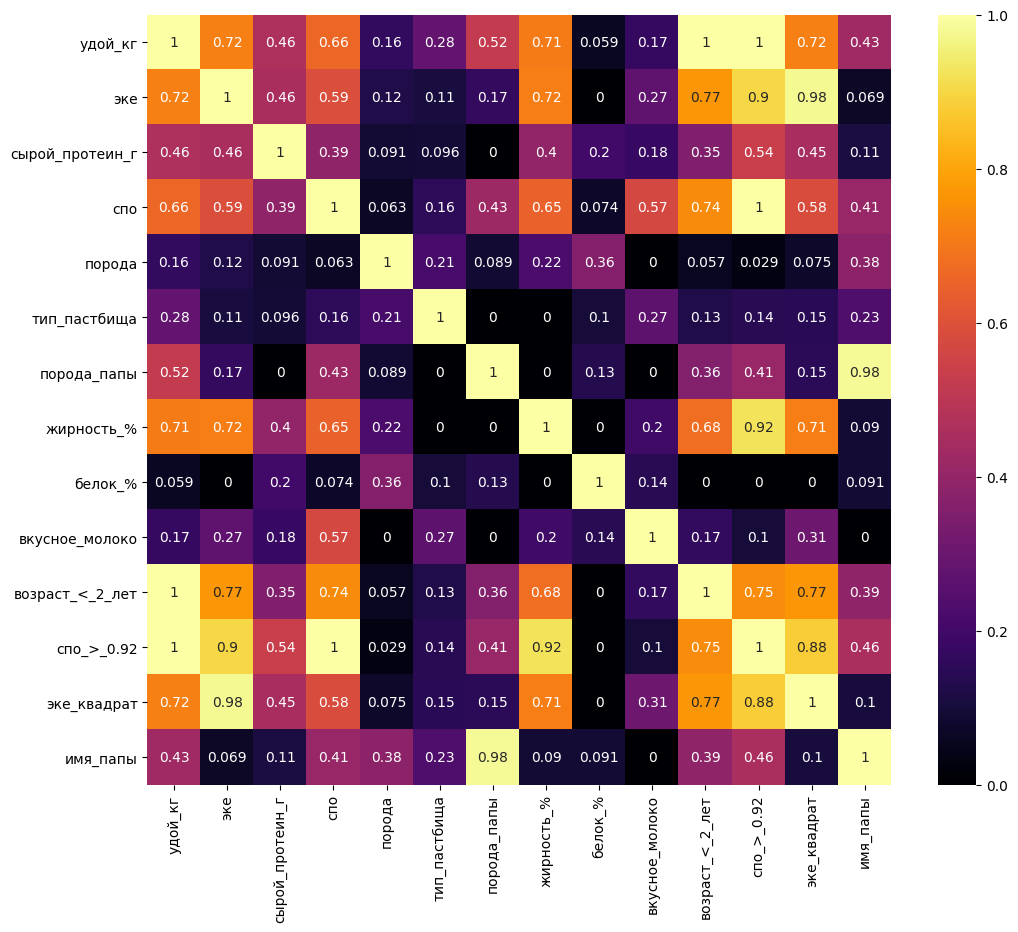

In [58]:
# Посмотрим на связь признаков с помощью коэффициента фи, так как скорее всего имя папы связано с породой папы слишком сильно
plt.figure(figsize=(12, 10))
sns.heatmap(ferma_main.drop('id', axis=1).phik_matrix(interval_cols=['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%', 'эке_квадрат']), annot=True, cmap='inferno')
plt.show()

Связь между именем папы и породой папы действительно высокая - коэффициент корреляции Фи равен 0.98. Посмотрим, как это повлияет на качество модели, но вообще признак лучше исключить, так как мультиколлинеарность негативно влияет на линейную регрессию.

In [59]:
# Подготовка даннных для модели 3
X_3 = ferma_main[['эке_квадрат', 'сырой_протеин_г', 'спо_>_0.92', 'порода_папы', 'порода', 'возраст_<_2_лет', 'имя_папы', 'тип_пастбища']]
y_3 = ferma_main['удой_кг']

Категориальные признаки: ['спо_>_0.92', 'порода_папы', 'порода', 'возраст_<_2_лет', 'имя_папы', 'тип_пастбища']
Количественные признаки: ['эке_квадрат', 'сырой_протеин_г']
спо_>_0.92         2
порода_папы        2
порода             2
возраст_<_2_лет    2
имя_папы           4
тип_пастбища       2
dtype: int64


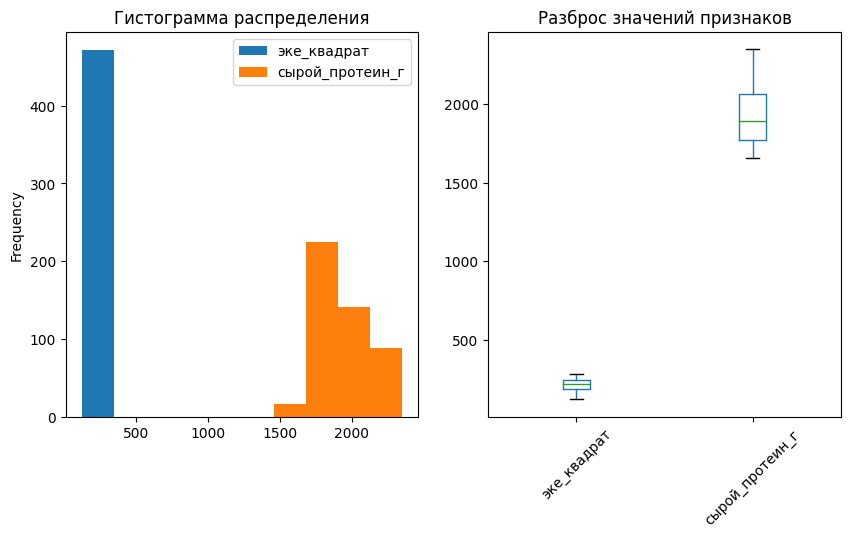

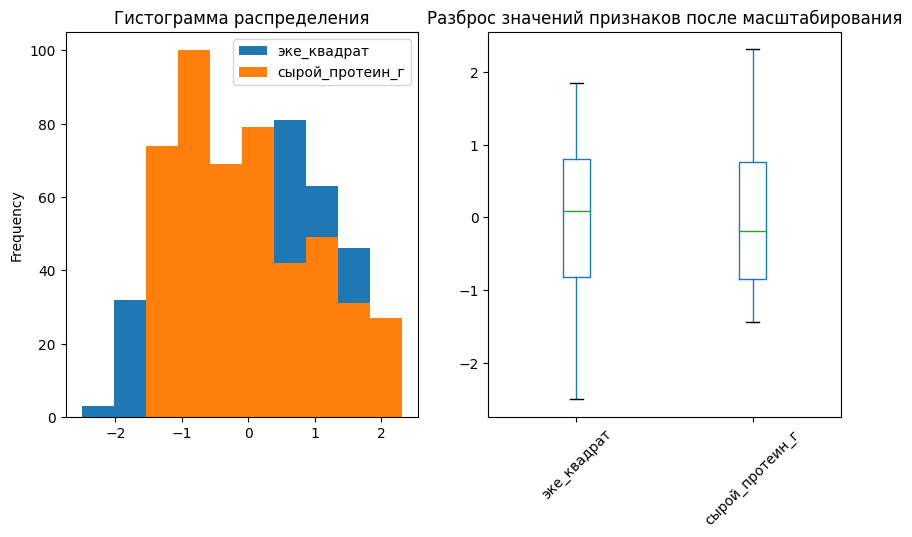

R2 LinearRegression = 0.8247542745210406


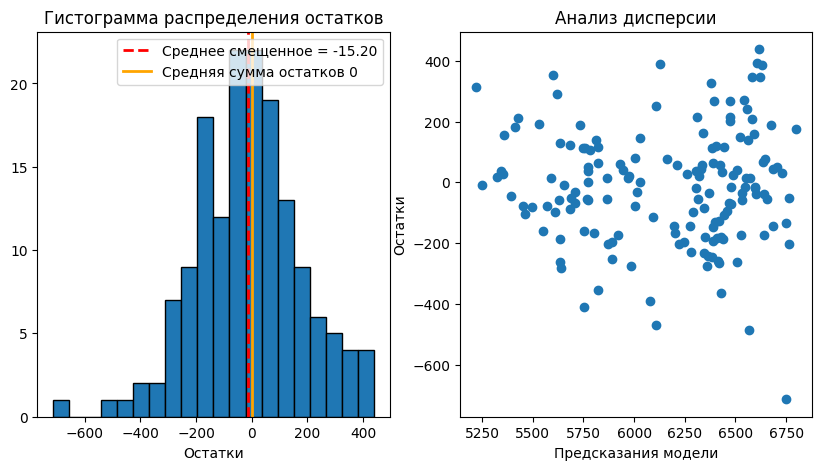

In [60]:
# Создание модели линейной регрессии 3
model_3, r2_3, residuals_3, predictions_3, y_test, scaler_3, encoder_3 = process_and_train_model(X_3, y_3)

Коэффициент детерминации 0.825.   
Остатки распределены нормально с небольшим по сравнению с прошлыми моделями смещением влево: модель завышает значения. Дисперсия остатков показывает, что разброс остатков не постоянен, модель может работать некорректно для предсказания высокого удоя (выше 6500), однако в общем дисперсия уменьшилась.

Попробуем исключить мультиколлинеарность и исключить признак порода папы.

### Модель линейной регрессии №3.1

Категориальные признаки: ['спо_>_0.92', 'порода', 'возраст_<_2_лет', 'имя_папы', 'тип_пастбища']
Количественные признаки: ['эке_квадрат', 'сырой_протеин_г']
спо_>_0.92         2
порода             2
возраст_<_2_лет    2
имя_папы           4
тип_пастбища       2
dtype: int64


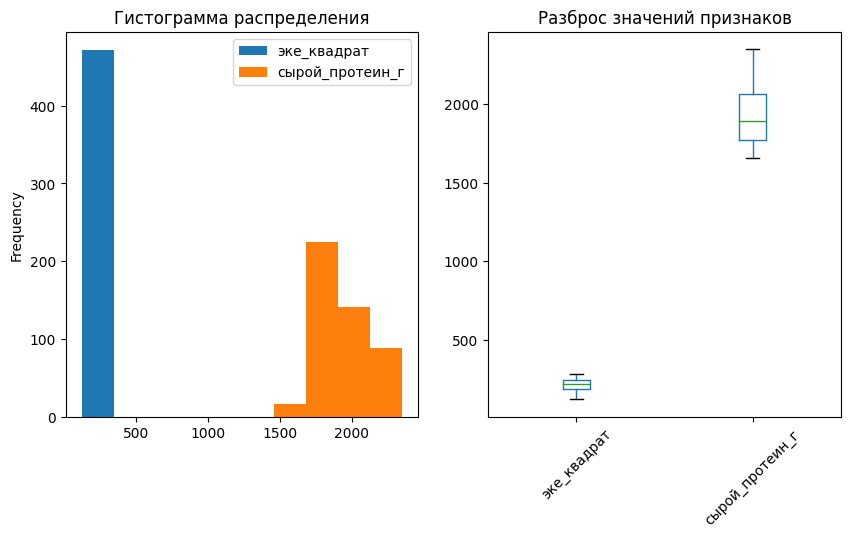

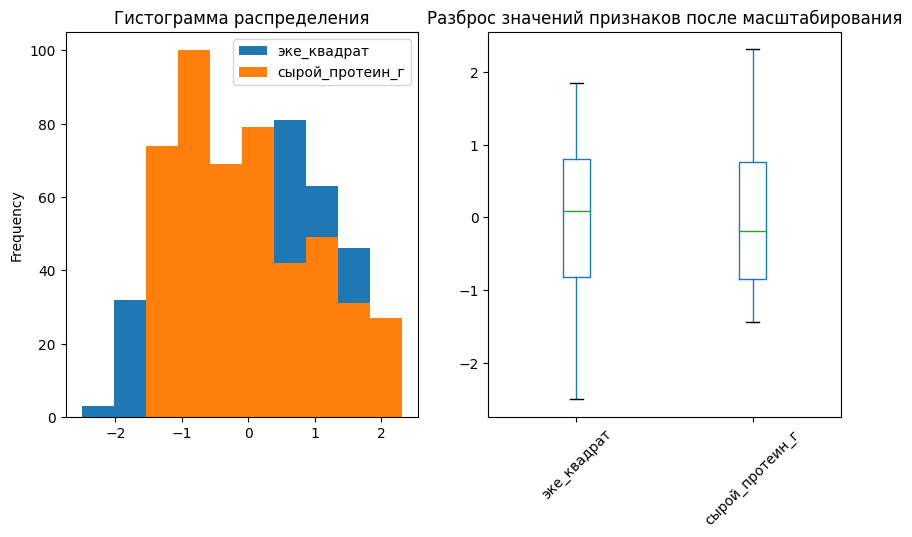

R2 LinearRegression = 0.8265123645098965


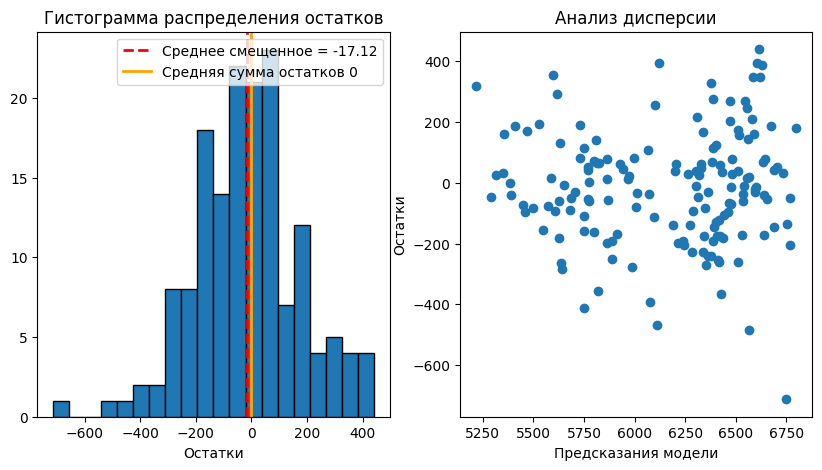

In [61]:
# Подготовка даннных для модели 3_1
X_3_1 = ferma_main[['эке_квадрат', 'сырой_протеин_г', 'спо_>_0.92', 'порода', 'возраст_<_2_лет', 'имя_папы', 'тип_пастбища']]
y_3_1 = ferma_main['удой_кг']


# Создание модели линейной регрессии 3_1
model_3_1, r2_3_1, residuals_3_1, predictions_3_1, y_test, scaler_3_1, encoder_3_1 = process_and_train_model(X_3_1, y_3_1)

Коэффициент детерминации 0.826 - несколько больше, чем для модели 3, однако смещение среднего остатков выросло (на -1.92), дисперсия остатков также говорит о возможной неточности предсказаний высокого удоя (выше 6550). Необходимо оценить качество моделей другими метриками.

In [62]:
# Создадим функцию для расчета основных метрик качества модели линейной регрессии
def evaluate_quality_linear_regression(y_test, predictions):
    """A function for linear regression quality metrics calculation"""
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    msa = mean_absolute_error(y_test, predictions)
    return print(f'Метрики модели:\nMSE: {round(mse, 2)}\nRMSE: {round(rmse, 2)}\nMSA: {round(msa,2)}')

In [64]:
# Рассчитаем метрики для первой модели
evaluate_quality_linear_regression(y_test, predictions_1)

Метрики модели:
MSE: 43887.02
RMSE: 209.49
MSA: 164.24


In [65]:
# Рассчитаем метрики для второй модели
evaluate_quality_linear_regression(y_test, predictions_2)

Метрики модели:
MSE: 37030.91
RMSE: 192.43
MSA: 149.04


In [66]:
# Рассчитаем метрики для модели 3
evaluate_quality_linear_regression(y_test, predictions_3)

Метрики модели:
MSE: 35673.89
RMSE: 188.88
MSA: 146.16


In [67]:
# Рассчитаем метрики для модели 3_1
evaluate_quality_linear_regression(y_test, predictions_3_1)

Метрики модели:
MSE: 35316.0
RMSE: 187.93
MSA: 144.64


In [68]:
print(f'Для модели 1 коэффициент детерминации: {r2_1},\nДля модели 2 коэффициент детерминации: {r2_2},\nДля модели 3 коэффициент детерминации: {r2_3},\nДля модели 3_1 коэффициент детерминации: {r2_3_1}.')

Для модели 1 коэффициент детерминации: 0.7844078173416968,
Для модели 2 коэффициент детерминации: 0.8180879926867504,
Для модели 3 коэффициент детерминации: 0.8247542745210406,
Для модели 3_1 коэффициент детерминации: 0.8265123645098965.


Анализируя метрики моделей, можно сказать, что каждая следующая модель более точно предсказывает удой коров. Поэтому самой качественной моделью можно назвать модель 3_1, в которой устранена нелинейность, добавлен признак "имя папы" вместо признака "порода папы".

In [69]:
# Создание функции для расчета доверительного интервала прогноза. Для этого нужно рассчитать квантили ошибки модели на тренировочных данных.
def calculate_confident_interval(residuals):
    percentile_25 = np.percentile(residuals, 2.5)
    percentile_975 = np.percentile(residuals, 97.5)
    return print(f'Доверительный интервал модели находится между {round(percentile_25)} и {round(percentile_975)}')


In [70]:
# Рассчитаем доверительный интервал предсказаний модели 1
calculate_confident_interval(residuals_1)

Доверительный интервал модели находится между -403 и 420


In [71]:
# Рассчитаем доверительный интервал предсказаний модели 2
calculate_confident_interval(residuals_2)

Доверительный интервал модели находится между -367 и 383


In [72]:
# Рассчитаем доверительный интервал предсказаний модели 3
calculate_confident_interval(residuals_3)

Доверительный интервал модели находится между -393 и 356


In [73]:
# Рассчитаем доверительный интервал предсказаний модели 3_1
calculate_confident_interval(residuals_3_1)

Доверительный интервал модели находится между -393 и 358


Доверительный интервал можно интерпретировать как диапазон, в котором находятся возможные ошибки модели при прогнозировании. Наименьшим доверительным интервалом обладает модель 3_1 и 3.

### Прогноз удоя коров для покупки

Для прогноза удоя будем использовать модель с наименьшими показателями ошибок и самым высоким коэфициентом детерминации - модель 3_1.

In [74]:
# Добавление недостающих признаков для коров Экофермы с учетом, что Вольный луг планирует увеличить параметры на 5%
cow_buy['эке_квадрат'] = ferma_main['эке_квадрат'].mean() * 1.05
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean() * 1.05
# Так как параметры предполагается увеличить, то и категориальный признак СПО примем равным 1
cow_buy['спо'] = 1
cow_buy['спо_>_0.92'] = cow_buy['спо'].astype(bool)

cow_buy.head()

порода тип_пастбища порода_папы  имя_папы  жирность_%  белок_%  \
0   Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
1   Вис Бик Айдиал    равнинное     Соверин    Буйный        3.54    3.081   
2  РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
3  РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.061   
4  РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   

   возраст_<_2_лет  эке_квадрат  сырой_протеин_г  спо  спо_>_0.92  
0            False   224.025225      2019.947532    1        True  
1             True   224.025225      2019.947532    1        True  
2            False   224.025225      2019.947532    1        True  
3            False   224.025225      2019.947532    1        True  
4            False   224.025225      2019.947532    1        True

In [76]:
# Выделение входных признаков
X_buy = cow_buy[['эке_квадрат', 'сырой_протеин_г', 'спо_>_0.92', 'порода', 'возраст_<_2_лет', 'имя_папы', 'тип_пастбища']]

num_col_names = ['эке_квадрат', 'сырой_протеин_г']
cat_col_names = ['спо_>_0.92', 'порода', 'возраст_<_2_лет','имя_папы', 'тип_пастбища']

# Масштабирование количественных признаков
X_buy_scaled = scaler_3_1.transform(X_buy[num_col_names])

# Кодирование категориальных признаков
X_buy_ohe = encoder_3_1.transform(X_buy[cat_col_names])

# Получение имен закодированных признаков
encoder_col_names = encoder_3_1.get_feature_names(cat_col_names)

# Преобразование массивов NumPy в DataFrame
X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names, index=X_buy.index)
X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names, index=X_buy.index)

# Объединение признаков
X_buy = pd.concat([X_buy_ohe, X_buy_scaled], axis=1)

# Спрогнозируем удой коров Экофермы
cow_buy['удой_кг'] = model_3_1.predict(X_buy)
cow_buy



порода тип_пастбища порода_папы  имя_папы  жирность_%  белок_%  \
0    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
1    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.54    3.081   
2   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
3   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.061   
4   РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   
5   РефлешнСоверинг    равнинное     Соверин  Геркулес        3.63    3.053   
6    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
7    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.57    3.079   
8   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
9   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.079   
10   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.055   
11  РефлешнСоверинг    равнинное     Соверин  Геркулес        3.73    3.073   
12   Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.68    3.046   
13   Вис Бик Айдиал    холмистое     Соверин     Барин        3.42    3.075   
14  РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
15  РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.065   
16   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.079   
17  РефлешнСоверинг    равнинное     Соверин  Геркулес        3.77    3.053   
18   Вис Бик Айдиал    равнинное     Соверин    Буйный        3.34    3.069   
19  РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   

    возраст_<_2_лет  эке_квадрат  сырой_протеин_г  спо  спо_>_0.92  \
0             False   224.025225      2019.947532    1        True   
1              True   224.025225      2019.947532    1        True   
2             False   224.025225      2019.947532    1        True   
3             False   224.025225      2019.947532    1        True   
4             False   224.025225      2019.947532    1        True   
5              True   224.025225      2019.947532    1        True   
6             False   224.025225      2019.947532    1        True   
7             False   224.025225      2019.947532    1        True   
8             False   224.025225      2019.947532    1        True   
9              True   224.025225      2019.947532    1        True   
10            False   224.025225      2019.947532    1        True   
11            False   224.025225      2019.947532    1        True   
12            False   224.025225      2019.947532    1        True   
13             True   224.025225      2019.947532    1        True   
14            False   224.025225      2019.947532    1        True   
15            False   224.025225      2019.947532    1        True   
16            False   224.025225      2019.947532    1        True   
17             True   224.025225      2019.947532    1        True   
18            False   224.025225      2019.947532    1        True   
19            False   224.025225      2019.947532    1        True   

        удой_кг  
0   6568.077324  
1   6293.908774  
2   6240.773904  
3   6551.661583  
4   6502.662485  
5   6339.801079  
6   6568.077324  
7   6487.924202  
8   6240.773904  
9   6357.646155  
10  6298.477860  
11  6533.816508  
12  6568.077324  
13  6081.019292  
14  6240.773904  
15  6551.661583  
16  6298.477860  
17  6339.801079  
18  6487.924202  
19  6502.662485

Для прогноза удоя использована модель линейной регрессии 3_1. Все коровы должны давать более 6000 кг молока.

## Обучение модели логистической регрессии

In [77]:
# Выделим входные признаки с учетом коэффициента корреляции Фи и здравого смысла
X = ferma_main[['эке_квадрат', 'спо_>_0.92', 'жирность_%', 'тип_пастбища', 'белок_%']]
y = ferma_main['вкусное_молоко']

Входные признаки: показатели качества корма (ЭКЕ, СПО, тип пастбища), жирность молока, белок - объективно влияет на вкус молока. 
Вместо самого ЭКЕ выбран ЭКЕ квадрат, так как коэффициент корреляции Фи выше для ЭКЕ квадрат.

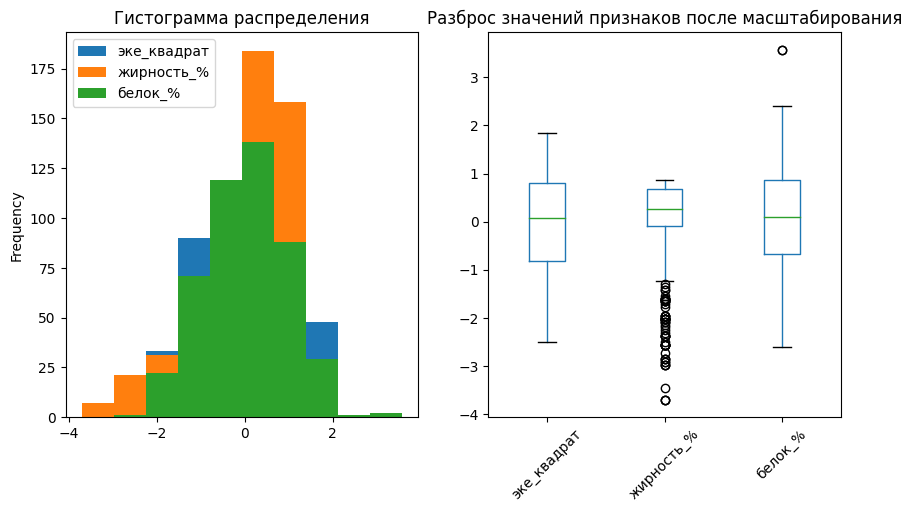

In [78]:
# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)
# Выделим категориальные и количественные признаки
num_col_names = ['эке_квадрат', 'жирность_%', 'белок_%']
cat_col_names = ['спо_>_0.92', 'тип_пастбища']

# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names(cat_col_names)

# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Преобразование массивов NumPy в DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names, index=X_test.index)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names, index=X_test.index)

# Объединение признаков
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Проверка распределения и разброса после масштабирования
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков после масштабирования')
plt.show()
    

In [79]:
# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

In [80]:
# Рассчитаем метрики для модели логистической регрессии
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(accuracy,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.624
recall:  0.852
precision:  0.62


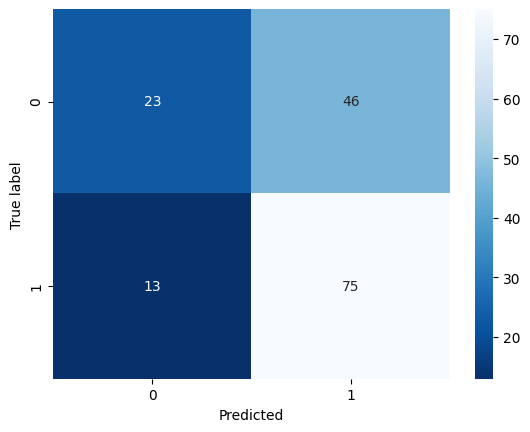

In [81]:
# Построим Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figsize=(10, 6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Для фермера важно получить вкусное молоко. Значит, необходимо сократить количество FP (False Positive) - предсказаний, что молоко будет вкусным, а на самом деле не будет. Поэтому необходимо свести ошибку 1-го рода к 0, следовательно, важна метрика presicion - отношение правильно предсказанных "1" ко всем предсказанным "1".  
Необходимо повысить precision, так как значение 0.62 - очень низкое в нашем случае.    
Необходимо повысить порог классификации, чтобы класс 1 - вкусное молоко - точно не был присвоен ошибочно.

In [82]:
# Найдем оценки вероятности принадлежности к классу 1
y_proba = clf.predict_proba(X_test)[:,1]

# Создадим датафрейм с оценками вероятности принадлежности к классу 1
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False)


# Создадим расчётные столбцы с предсказаниями для каждого порога
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
print(thresholds) 
# Создадим переменную, которая будет хранить список новых колонок
columns = []

# Добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda y_proba: 1 if y_proba > i else 0)


display(data.head(5))

[0.1, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91]


y_test   y_proba  y_pred_0.1  y_pred_0.19  y_pred_0.28  y_pred_0.37  \
66     True  0.833273           1            1            1            1   
136    True  0.824544           1            1            1            1   
110    True  0.816374           1            1            1            1   
116   False  0.808069           1            1            1            1   
85     True  0.807915           1            1            1            1   

     y_pred_0.46  y_pred_0.55  y_pred_0.64  y_pred_0.73  y_pred_0.82  \
66             1            1            1            1            1   
136            1            1            1            1            1   
110            1            1            1            1            0   
116            1            1            1            1            0   
85             1            1            1            1            0   

     y_pred_0.91  
66             0  
136            0  
110            0  
116            0  
85             0

In [83]:
# Найдем порог классификации, при котором precision = 1
threshold = 0.5
while True:
    threshold+=0.001
    pred = (clf.predict_proba(X_test)[:,1] >= threshold).astype('bool')
    if precision_score(y_test, pred) == 1:
        break
print(f'Порог, при котором Precision максимальный: {threshold}')

Порог, при котором Precision максимальный: 0.8090000000000003


In [84]:
# Предскажем вкус молока с найденным порогом классификации для сведения к нулю ошибки 1-го рода

y_pred = (y_proba >= threshold).astype(int)

# Рассчитаем метрики качества прогноза с порогом классификации 0.8
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(accuracy,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.459
recall:  0.034
precision:  1.0


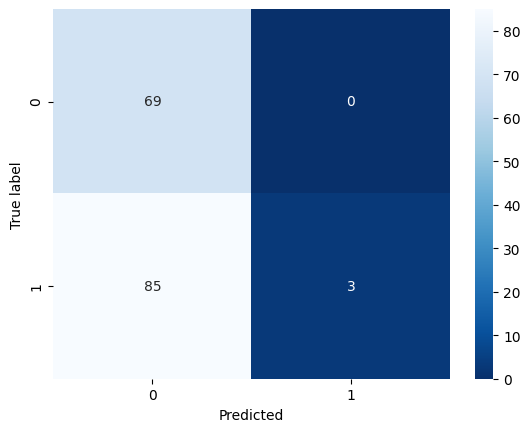

In [85]:
# Построим Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figsize=(10, 6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

С порогом классификации 0.8 модель не будет давать False Positive прогнозов, что важно для фермера в случае, если он хочет получать только вкусное молоко. Однако из-за высокого порога будет пропущено множество False Negative прогнозов.   
Посмотрим, как модель будет работать для данных Экофермы.

In [86]:
X_buy = cow_buy[['эке_квадрат', 'спо_>_0.92', 'жирность_%', 'тип_пастбища', 'белок_%']]
#y_buy = cow_buy['вкусное_молоко']

X_buy_ohe = encoder.transform(X_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names(cat_col_names)

# Масштабирование количественных признаков
X_buy_scaled = scaler.transform(X_buy[num_col_names])

# Преобразование массивов NumPy в DataFrame
X_buy_ohe = pd.DataFrame(X_buy_ohe, columns=encoder_col_names, index=X_buy.index)
X_buy_scaled = pd.DataFrame(X_buy_scaled, columns=num_col_names, index=X_buy.index)

# Объединение признаков
X_buy = pd.concat([X_buy_ohe, X_buy_scaled], axis=1)
X_buy = pd.concat([X_buy_ohe, X_buy_scaled], axis=1)


In [88]:
# Найдем оценки вероятности принадлежности к классу 1
y_proba_buy = clf.predict_proba(X_buy)[:,1]

# Предскажем вкус молока с порогом классификации 0.8 для сведения к нулю ошибки 1-го рода
cow_buy['вкусное_молоко'] = (y_proba_buy >=threshold).astype(bool)
display(cow_buy)
print(f' Коров со вкусным молоком: {len(cow_buy.loc[cow_buy["вкусное_молоко"] == True])}')

порода тип_пастбища порода_папы  имя_папы  жирность_%  белок_%  \
0    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
1    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.54    3.081   
2   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
3   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.061   
4   РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   
5   РефлешнСоверинг    равнинное     Соверин  Геркулес        3.63    3.053   
6    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
7    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.57    3.079   
8   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
9   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.079   
10   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.055   
11  РефлешнСоверинг    равнинное     Соверин  Геркулес        3.73    3.073   
12   Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.68    3.046   
13   Вис Бик Айдиал    холмистое     Соверин     Барин        3.42    3.075   
14  РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
15  РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.065   
16   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.079   
17  РефлешнСоверинг    равнинное     Соверин  Геркулес        3.77    3.053   
18   Вис Бик Айдиал    равнинное     Соверин    Буйный        3.34    3.069   
19  РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   

    возраст_<_2_лет  эке_квадрат  сырой_протеин_г  спо  спо_>_0.92  \
0             False   224.025225      2019.947532    1        True   
1              True   224.025225      2019.947532    1        True   
2             False   224.025225      2019.947532    1        True   
3             False   224.025225      2019.947532    1        True   
4             False   224.025225      2019.947532    1        True   
5              True   224.025225      2019.947532    1        True   
6             False   224.025225      2019.947532    1        True   
7             False   224.025225      2019.947532    1        True   
8             False   224.025225      2019.947532    1        True   
9              True   224.025225      2019.947532    1        True   
10            False   224.025225      2019.947532    1        True   
11            False   224.025225      2019.947532    1        True   
12            False   224.025225      2019.947532    1        True   
13             True   224.025225      2019.947532    1        True   
14            False   224.025225      2019.947532    1        True   
15            False   224.025225      2019.947532    1        True   
16            False   224.025225      2019.947532    1        True   
17             True   224.025225      2019.947532    1        True   
18            False   224.025225      2019.947532    1        True   
19            False   224.025225      2019.947532    1        True   

        удой_кг  вкусное_молоко  
0   6568.077324           False  
1   6293.908774           False  
2   6240.773904           False  
3   6551.661583           False  
4   6502.662485           False  
5   6339.801079           False  
6   6568.077324           False  
7   6487.924202           False  
8   6240.773904           False  
9   6357.646155           False  
10  6298.477860           False  
11  6533.816508           False  
12  6568.077324           False  
13  6081.019292           False  
14  6240.773904           False  
15  6551.661583           False  
16  6298.477860           False  
17  6339.801079           False  
18  6487.924202           False  
19  6502.662485           False

 Коров со вкусным молоком: 0


С порогом классификации 0.8 фермер получается слишком много False Negative предсказаний, поэтому фермер не сможет выбрать ни одну корову из представленных Экофермой при условии полного отсутствия ошибок 1-го рода.
Если фермеру необходимо купить коров из представленных Экофермой и с существующим набором признаков, можно снизить порог, чтобы не пропустить True Positive прогнозы, при этом количество False Positive возрастет.

***Вариант покупки коров в существующих условиях не с минимальным риском***

In [89]:
# Предскажем вкус молока с порогом классификации 0.66
threshold = 0.66
y_pred = (y_proba >= threshold).astype(int)

# Рассчитаем метрики качества прогноза с порогом классификации 0.66
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(accuracy,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.631
recall:  0.489
precision:  0.768


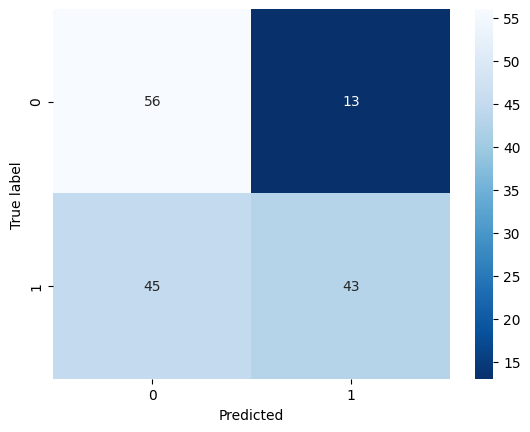

In [90]:
# Построим Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figsize=(10, 6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

С порогом классификации 0.66 ошибки 1-го рода не сведены к 0, но сведены к минимуму и при этом позволяют не пропустить все предсказания 1 - вкусное молоко - как компромиссный вариант, если фермеру все-таки нужно купить коров.


In [91]:
# Найдем оценки вероятности принадлежности к классу 1
y_proba_buy = clf.predict_proba(X_buy)[:,1]

# Предскажем вкус молока с порогом классификации 0.66
cow_buy['вкусное_молоко'] = (y_proba_buy >=threshold).astype(bool)
cow_buy

порода тип_пастбища порода_папы  имя_папы  жирность_%  белок_%  \
0    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
1    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.54    3.081   
2   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
3   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.061   
4   РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   
5   РефлешнСоверинг    равнинное     Соверин  Геркулес        3.63    3.053   
6    Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.58    3.076   
7    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.57    3.079   
8   РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
9   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.079   
10   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.055   
11  РефлешнСоверинг    равнинное     Соверин  Геркулес        3.73    3.073   
12   Вис Бик Айдиал    холмистое      Айдиал  Геркулес        3.68    3.046   
13   Вис Бик Айдиал    холмистое     Соверин     Барин        3.42    3.075   
14  РефлешнСоверинг    равнинное     Соверин     Барин        3.59    3.074   
15  РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.065   
16   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.079   
17  РефлешнСоверинг    равнинное     Соверин  Геркулес        3.77    3.053   
18   Вис Бик Айдиал    равнинное     Соверин    Буйный        3.34    3.069   
19  РефлешнСоверинг    равнинное      Айдиал    Буйный        3.64    3.074   

    возраст_<_2_лет  эке_квадрат  сырой_протеин_г  спо  спо_>_0.92  \
0             False   224.025225      2019.947532    1        True   
1              True   224.025225      2019.947532    1        True   
2             False   224.025225      2019.947532    1        True   
3             False   224.025225      2019.947532    1        True   
4             False   224.025225      2019.947532    1        True   
5              True   224.025225      2019.947532    1        True   
6             False   224.025225      2019.947532    1        True   
7             False   224.025225      2019.947532    1        True   
8             False   224.025225      2019.947532    1        True   
9              True   224.025225      2019.947532    1        True   
10            False   224.025225      2019.947532    1        True   
11            False   224.025225      2019.947532    1        True   
12            False   224.025225      2019.947532    1        True   
13             True   224.025225      2019.947532    1        True   
14            False   224.025225      2019.947532    1        True   
15            False   224.025225      2019.947532    1        True   
16            False   224.025225      2019.947532    1        True   
17             True   224.025225      2019.947532    1        True   
18            False   224.025225      2019.947532    1        True   
19            False   224.025225      2019.947532    1        True   

        удой_кг  вкусное_молоко  
0   6568.077324           False  
1   6293.908774            True  
2   6240.773904           False  
3   6551.661583           False  
4   6502.662485           False  
5   6339.801079           False  
6   6568.077324           False  
7   6487.924202           False  
8   6240.773904           False  
9   6357.646155            True  
10  6298.477860           False  
11  6533.816508           False  
12  6568.077324           False  
13  6081.019292           False  
14  6240.773904           False  
15  6551.661583           False  
16  6298.477860            True  
17  6339.801079           False  
18  6487.924202           False  
19  6502.662485           False

Найдем коров, соответствующих критериям фермера с удоем более 6000 кг и вкусным молоком.

In [92]:
# Отфильтруем коров с удоем более 6000 кг и вкусным молоком
good_cows = cow_buy.loc[(cow_buy['удой_кг'] > 6000) & (cow_buy['вкусное_молоко'] == True)]
display(good_cows)
print(f' Фермер может купить {len(good_cows)} коровы из представленных на "Экоферме" с некоторым риском для себя.')

порода тип_пастбища порода_папы  имя_папы  жирность_%  белок_%  \
1    Вис Бик Айдиал    равнинное     Соверин    Буйный        3.54    3.081   
9   РефлешнСоверинг    холмистое      Айдиал    Буйный        3.40    3.079   
16   Вис Бик Айдиал    холмистое     Соверин  Соловчик        3.73    3.079   

    возраст_<_2_лет  эке_квадрат  сырой_протеин_г  спо  спо_>_0.92  \
1              True   224.025225      2019.947532    1        True   
9              True   224.025225      2019.947532    1        True   
16            False   224.025225      2019.947532    1        True   

        удой_кг  вкусное_молоко  
1   6293.908774            True  
9   6357.646155            True  
16  6298.477860            True

 Фермер может купить 3 коровы из представленных на "Экоферме" с некоторым риском для себя.


## Итоговые выводы

***1. Проведена предобработка данных.***    

Столбцы переименованы для удобства дальнейшей работы.
Изменены типы данных: с object на float для ЭКЕ, СПО, Жирность,%, Белок,%.   
Также для удобства изменен тип данных в столбце Возраст на boolean (менее 2 лет - True) и в столбце Вкус молока (вкусное - True).  
Пропусков в данных нет. Явные дубликаты удалены из таблиц ferma_main и cow_buy - таблицы приобрели одинаковые размеры.
Устранены опечатки в породе пап, типе пастбища в таблице ferma_main.

***2. Проведен исследовательский анализ данных.***   

- При анализе параметра "Удой_кг" выявлено аномально высокое значение 45616 кг, которое в разы превышает среднее значение параметра, поэтому принято решение удалить строку с аномалиями. Распределение параметра близко к нормальному.  

- Параметр "Содержание сырого протеина в корме" у коров "Вольного луга" отличается неоднородностью, связанной, скорее всего, с нормами производства кормов - возможно, существуют корма с разным содержанием протеина для различных целей, и содержание может варьироваться в пределах нормы, например, по ГОСТу.    

- Сахаро-протеиновое соотношение принимает значения от 0.84 до 0.96, при этом явно выделяются 3 группы данных с границами на значениях 0.87, 0.92. Возможно, это связано с характеристиками корма (например, эконом или премиум).

- Параметр жирности у "Вольного луга" варьируется от 2.99 до 3.75, в среднем равен 3.65%. Значения до 3.4 можно назвать выбросами, однако они оставлены в датасете, так как порядок значений не отличается от основных данных.  Для "Экофермы" параметр жирности молока на момент продажи у коров на продажу варьируется от 3.34 до 3.77%, что соответствует значениям жирности коров с фермы.

- Параметр содержания белков в молоке распределен нормально, выбросов практически нет, среднее значение 3.07%. Параметр содержания белков в молоке на момент продажи у коров Экофермы по значениям похож на параметр для коров фермы со средним значением 3.07%.   

- Большая часть коров на ферме "Вольный луг" старше 2 лет, на "Экоферме" ситуация похожа: 74% коров старше 2 лет. На ферме "Вольный луг" больше половины коров дают вкусное молоко (59%).   

- На обеих фермах породы распределены примерно одинаково, немного больше на всех фермах коров породы Айдиал и Вис Бик Айдиал.   

- По типам пастбищ на обеих фермах примерно одинаковое распределение, но на "Вольный луг" немного преобладают равнинные пастбища, на Экоферме - холмистые.   

- На ферме Вольный луг все коровы происходят от 4 быков, больше всего потомства у быка Барина, меньше всего - у Геркулеса.

- Большинство признаков разного масштаба, поэтому далее количественные признаки необходимо масштабировать, категориальные признаки - кодировать. 


***3. Проведен корреляционный анализ.***   

Сильная прямая линейная связь обнаруживается между входными признаками и целевым:   


На целевой признак удой влияют признаки: 
- ЭКЕ (коэфф. корреляции Фи 0.72);
- СПО (0.66);
- Жирность (0.71);
- Сырой протеин (0.46).  
- возраст коровы менее 2 лет или более (коэффициент корреляции Фи 1);
- порода папы (0.52);
- тип пастбища (0.28).  

На целевой признак вкус молока влияют (делают молоко вкусным по мнению фермера):
- СПО (коэффициент корреляции Фи 0.57);
- ЭКЕ (0.27);
- тип пастбища (0.27).   

Между входными признаками нет мультиколлинеарности (сильная зависимость с коэфф корреляции больше 0.9 наблюдается только для возраста коровы и удоем, но удой - целевой признак)


***4. Обучено 4 модели линейной регрессии.***

1) Модель 1   

В качестве входных признаков для модели линейной регрессии 1 выбраны признаки с высоким коэффициентом корреляции с целевым признаком (удой), а также те признаки, которые логически могут влиять на удой.  
Входные признаки: эке, сырой_протеин_г, спо, порода_папы, порода, возраст_<_2_лет, тип пастбища

Коэффициент детерминации R^2 = 0.784.    
Остатки распределены нормально со смещением влево: модель завышает значения. Дисперсия остатков показывает, что разброс остатков не постоянен, модель может работать некорректно для предсказания высокого удоя, а также может быть не учтена нелинейность зависимости целевого признака от входных признаков.

 
Метрики модели:  
MSE: 43887.02  
RMSE: 209.49  
MSA: 164.24   
 
2) Модель 2

Для прогнозирования того же целевого признака "удой" выбраны следующие входные признаки:
эке_квадрат, сырой_протеин_г, спо_>_0.92, порода_папы, порода, возраст_<_2_лет, тип пастбища. Значения ЭКЕ возведены в квадрат для устранения нелинейности зависимости, значения СПО распределены по 2 классам: 1 - больше 0.92, 0 - меньше 0.92.   

Ситуация стала немного лучше после преобразования данных по сравнению с моделью 1.
Коэффициент детерминации R^2 = 0.818.
Остатки распределены нормально с чуть меньшим смещением влево: модель все еще завышает значения. Дисперсия остатков показывает, что разброс остатков не постоянен, модель может работать некорректно для предсказания высокого удоя (выше 6250).   

Метрики модели:   
MSE: 37030.91   
RMSE: 192.43   
MSA: 149.04    
 
3) Модель 3 

Для прогнозирования целевого признака "удой" добавлен признак "имя папы коровы", то есть входные признаки следующие: эке_квадрат, сырой_протеин_г, спо_>_0.92, порода_папы, порода, возраст_<_2_лет, имя папы, тип пастбища.

5.
Остатки распределены нормально с небольшим по сравнению с прошлыми моделями смещением влево: модель завышает значения. Дисперсия остатков показывает, что разброс остатков не постоянен, модель может работать некорректно для предсказания высокого удоя (выше 6500), однако в общем дисперсия уменьшилась.
 
Метрики модели:    
MSE: 35673.89   
RMSE: 188.88   
MSA: 146.16      

Связь между именем папы и породой папы высокая - коэффициент корреляции Фи равен 0.98. Попробуем исключить мультиколлинеарность и исключить признак порода папы в следующей модели 3.1.   

4) Модель 3.1

Входные признаки модели: эке_квадрат, сырой_протеин_г, спо_>_0.92, порода, возраст_<_2_лет, имя папы, тип пастбища.
Исключен признак порода папы из-за высокой связи с именем папы.

Коэффициент детерминации 0.827 - несколько больше, чем для модели 3, однако смещение среднего остатков выросло (на -1.18), дисперсия остатков также говорит о возможной неточности предсказаний высокого удоя (выше 6500). 

 
Метрики модели:   
MSE: 35316.0   
RMSE: 187.93   
MSA: 144.64    

Основные метрики выше, чем для модели 3. Доверительный интервал модели 3_1 находится между -390 и 358, а модели 3 между -391 и 356 - разброс практически 
одинаковый.

Для модели 1 коэффициент детерминации: 0.7844078173416968,
Для модели 2 коэффициент детерминации: 0.8180879926867504,
Для модели 3 коэффициент детерминации: 0.8247542745210406,
Для модели 3_1 коэффициент детерминации: 0.8265123645098965.

В целом, модель 3.1 немного точнее, чем модель 3.

***5. Прогноз удоя коров "Экофермы".***   

Для прогноза удоя решено выбрать модель 3_1, так как по всем показателям ее качество прогноза выше. 
В результате прогноза, все коровы "Экофермы" должны давать более 6000 кг молока.

***6. Обучение модели логистической регрессии.***   

Входные признаки: показатели качества корма (ЭКЕ, СПО, тип пастбища), жирность молока - объективно влияет на вкус молока. Вместо самого ЭКЕ выбран ЭКЕ квадрат, так как коэффициент корреляции Фи выше для ЭКЕ квадрат.   

Для фермера важно получить вкусное молоко. Значит, необходимо сократить количество FP (False Positive) - предсказаний, что молоко будет вкусным, а на самом деле не будет. Поэтому необходимо свести ошибку 1-го рода к 0, следовательно, важна метрика presicion - отношение правильно предсказанных "1" ко всем предсказанным "1".
- При стандартном пороге классификации 0.5 метрики качества модели следующие:   

accuracy:  0.624  
recall:  0.852  
precision:  0.62   

Необходимо повысить precision, так как значение 0.62 - очень низкое при желании фермера точно получить вкусное молоко.
Необходимо повысить порог классификации, чтобы класс 1 - вкусное молоко - точно не был присвоен ошибочно.    

Проанализированы различные значения порога классификации:
- С порогом классификации 0.809 модель не будет давать False Positive прогнозов, что важно для фермера в случае, если он хочет получать только вкусное молоко. Однако из-за высокого порога будет получено множество False Negative прогнозов.  

Метрики качества:   
accuracy:  0.459     
recall:  0.034  
precision:  1.0      

С порогом классификации 0.809 фермер получается слишком много False Negative предсказаний, поэтому фермер не сможет выбрать ни одну корову из представленных Экофермой при условии полного отсутствия ошибок 1-го рода.
Если фермеру необходимо купить коров из представленных Экофермой и с существующим набором признаков, можно снизить порог, чтобы не пропустить True Positive прогнозы, при этом количество False Positive возрастет.

- С порогом классификации 0.66 ошибки 1-го рода не сведены к 0, но сведены к минимуму и при этом позволяют не пропустить все предсказания 1 - вкусное молоко - как компромиссный вариант.   

Метрики качества модели выглядят следующим образом:   

accuracy:  0.631  
recall:  0.489   
precision:  0.768    

Для предсказания вкуса молока используем вторую модель логистической регрессии с показателем precision 1, как по техническому заданию фермера. Однако все модели имеют достаточно низкое качество. Скорее всего, не хватает входных признаков для определения вкуса молока по мнению фермера.

***6. Рекомендации по выбору коров***   
В результате прогнозирования признаков удой и вкус молока по критериям "удой более 6000 кг" и "вкусное молоко" не отобрано ни одной коровы, которых можно было бы купить с минимальным риском для фермера.


Модель линейной регрессии, выбранная для прогноза удоя, дает минимальные ошибки прогнозов, в результате все коровы будут давать более 6000 кг молока. Модель логистической регрессии с выбранным порогом классификации предсказывает вкус молока наиболее точно: не допуская ошибок 1-го рода, поэтому в ограниченном наборе данных ни одна корова не будет давать вкусное молоко.

В качестве рекомендации, если фермеру нужно совершить покупку, можно снизить порог классификации, тогда с небольшим риском фермер может купить 3 коров.
Если же увеличивать риски не желательно, нужно дополнить таблицу новыми признаками, которые также могут влиять на вкус молока для фермера, либо выбирать коров из большего количества. 

Для улучшения качества модели логической регрессии использован способ изменения порога классификации, который влияет на вероятность ошибок 1 и 2 рода. Однако модель все равно получается не очень высокого качества: для улучшения модели можно было бы попробовать выполнить предсказание с дополнительными входными признаками, добавить новые признаки, для которых корреляция с целевым признаком выше.

При анализе рисков или экономических расчеты важны различные метрики моделей классификации в зависимости от целей и задач бизнеса. Можно оценивать важность метрики в зависимости от того, какую ошибку необходимо свести к минимуму:   
- Если разницы нет и точность пропустить положительные прогнозы и ошибиться с положительным прогнозом не важна, то используется метрика Accuracy;  
- Если важно не пропустить положительный прогноз, то важна метрика Recall;  
- Если главная цель - не ошибиться с положительным прогнозом, при этом можно пропустить часть положительных ответов, то бизнесу необходимо повышать метрику Precision.  